In [1]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels 
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import seaborn as sns

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text
plt.rcParams["font.family"]="Arial"

plt.rc("font",size=10)
plt.rc("axes", labelsize=22)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


## Screeplot Explained Variance

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  if __name__ == "__main__":


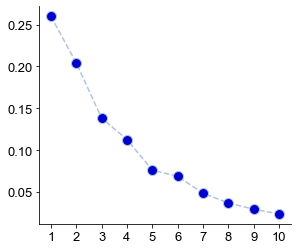

In [2]:
#import lambdas 
lambdas=np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/lambdas_lh.npy")
lambdas=lambdas/lambdas.sum()  #they need to add up to 1

fig, ax = plt.subplots(1, figsize=(4.5, 4))
num_lambdas=np.arange(1,11,1)
fig = plt.plot(num_lambdas, lambdas,"-o",color="lightsteelblue",
              markerfacecolor="mediumblue",
              markeredgecolor="lightsteelblue", markersize=10, linestyle="dashed")
#ax.set_xlabel('components', fontname="Arial", labelpad=8,fontsize=24) 
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])

#ax.set_ylabel('eigenvalues', fontname="Arial", labelpad=8,fontsize=24) 
ax.set_yticks([0.05,0.10,0.15,0.20,0.25])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.savefig("/Project1_thalamus_gradients/plots/figure1/screeplot_lambdas_lh.pdf", transparent=True, format='pdf', dpi=600)

## Sorted Structural Connectivity Matrix By Principal Gradient 

rows are sorted

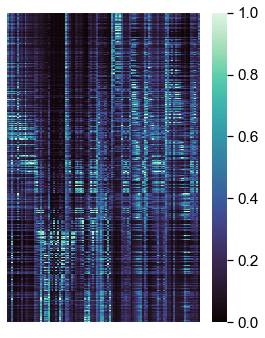

In [3]:
#load gradients and input structural connectivity matrix
gradients = np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradients_lh.npy")
gradient1=pd.Series(gradients[:,0])
conn_matrix=pd.DataFrame(np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/struc_conn_matrix_lh_avg.npy"))

sorted_thalamic_voxels = gradient1.sort_values().index # the gradient1 is a pd.Series
reordered_matrix = conn_matrix.loc[sorted_thalamic_voxels, :] # conn matrix is a pd.DataFrame with the shape (thalamic_voxels, cortex_parcels)

fig, ax = plt.subplots(1, figsize=(4,5))
fig = sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.5, 'font.family':'Arial'})
fig = sns.heatmap(data=reordered_matrix, vmin=0, vmax=1 ,ax = ax, 
                  cbar=True , #cbar_kws={"orientation":"vertical","label":"normalized","pad":0.06, "aspect":25},
                  cmap="mako", xticklabels=False, yticklabels=False)
#ax.set_xlabel("cortex parcels", fontname="Arial", labelpad=9, fontsize=23)
#ax.set_ylabel("thalamic seed voxels", fontname="Arial", labelpad=9, fontsize=23)

plt.tight_layout()
plt.savefig("/Project1_thalamus_gradients/data/figure1/structural_connectivity_sorted_lh.png", transparent=True, format='png', dpi=600)


## Affinity Matrix

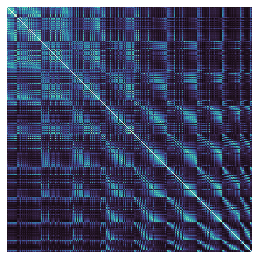

In [4]:
#load affinity matrix, gradients,struc_connectivity matrix
affinity = np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/affinity_lh.npy") 
fig, ax = plt.subplots(1, figsize=(4.5,4.5))
fig = sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5, 'font.family':'Arial'})
fig = sns.heatmap(data=affinity ,ax =ax, vmin=0.5, vmax=1,
                  cbar_kws={"orientation":"horizontal","pad":0.08},
                  square=True,
                  cmap="mako", cbar=False ,xticklabels=False, yticklabels=False)

plt.savefig("/Project1_thalamus_gradients/plots/figure1/affinity_lh.png", transparent=True, format='png', dpi=600)

## Gradient 1 plotted on thalamus

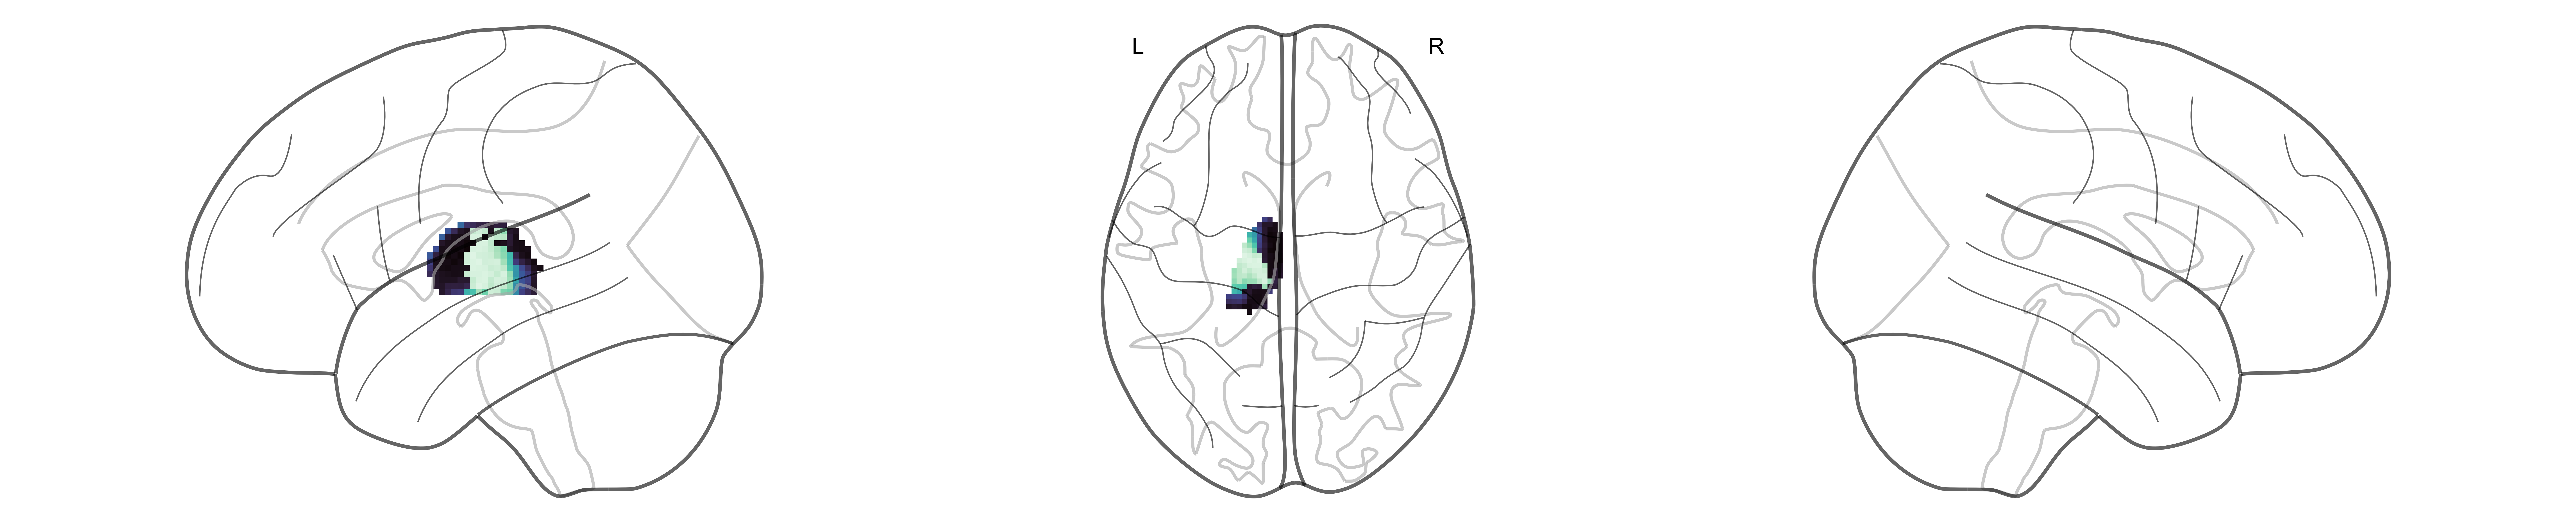

In [25]:
#axial view of glassbrain need to be mirrored

grad_tha_1="/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradient1_left_tha.nii.gz"

fig, ax = plt.subplots(1, figsize=(25,5), dpi=600)
display=plotting.plot_glass_brain(grad_tha_1, display_mode="lzr",
                                  figure=fig, axes=ax,
                                  colorbar=False, plot_abs=False, 
                                  symmetric_cbar=False, 
                                  cmap="mako",
                                  alpha=0.6)
display.savefig("/Project1_thalamus_gradients/plots/figure1/grad1_glassbrain_lh.svg")


/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


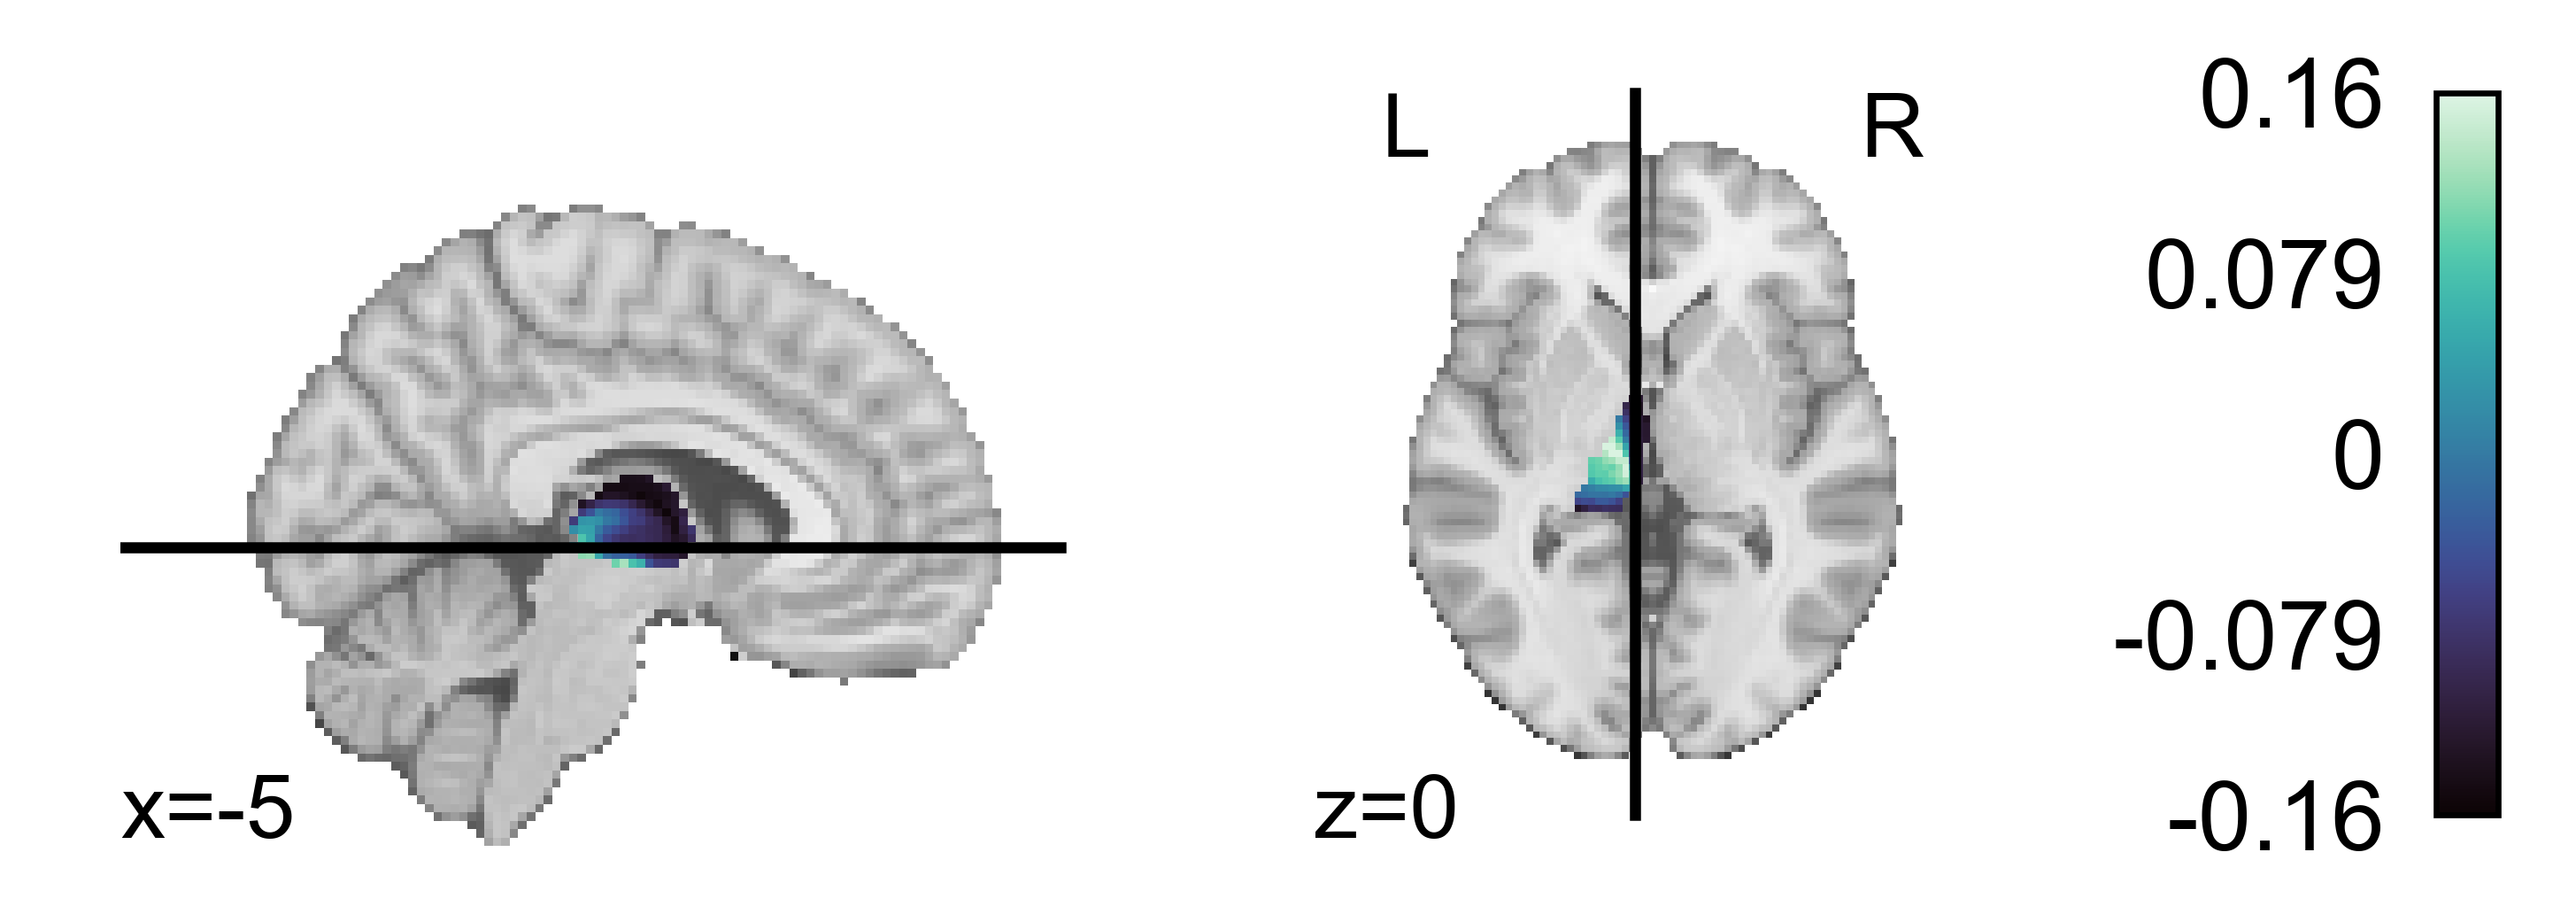

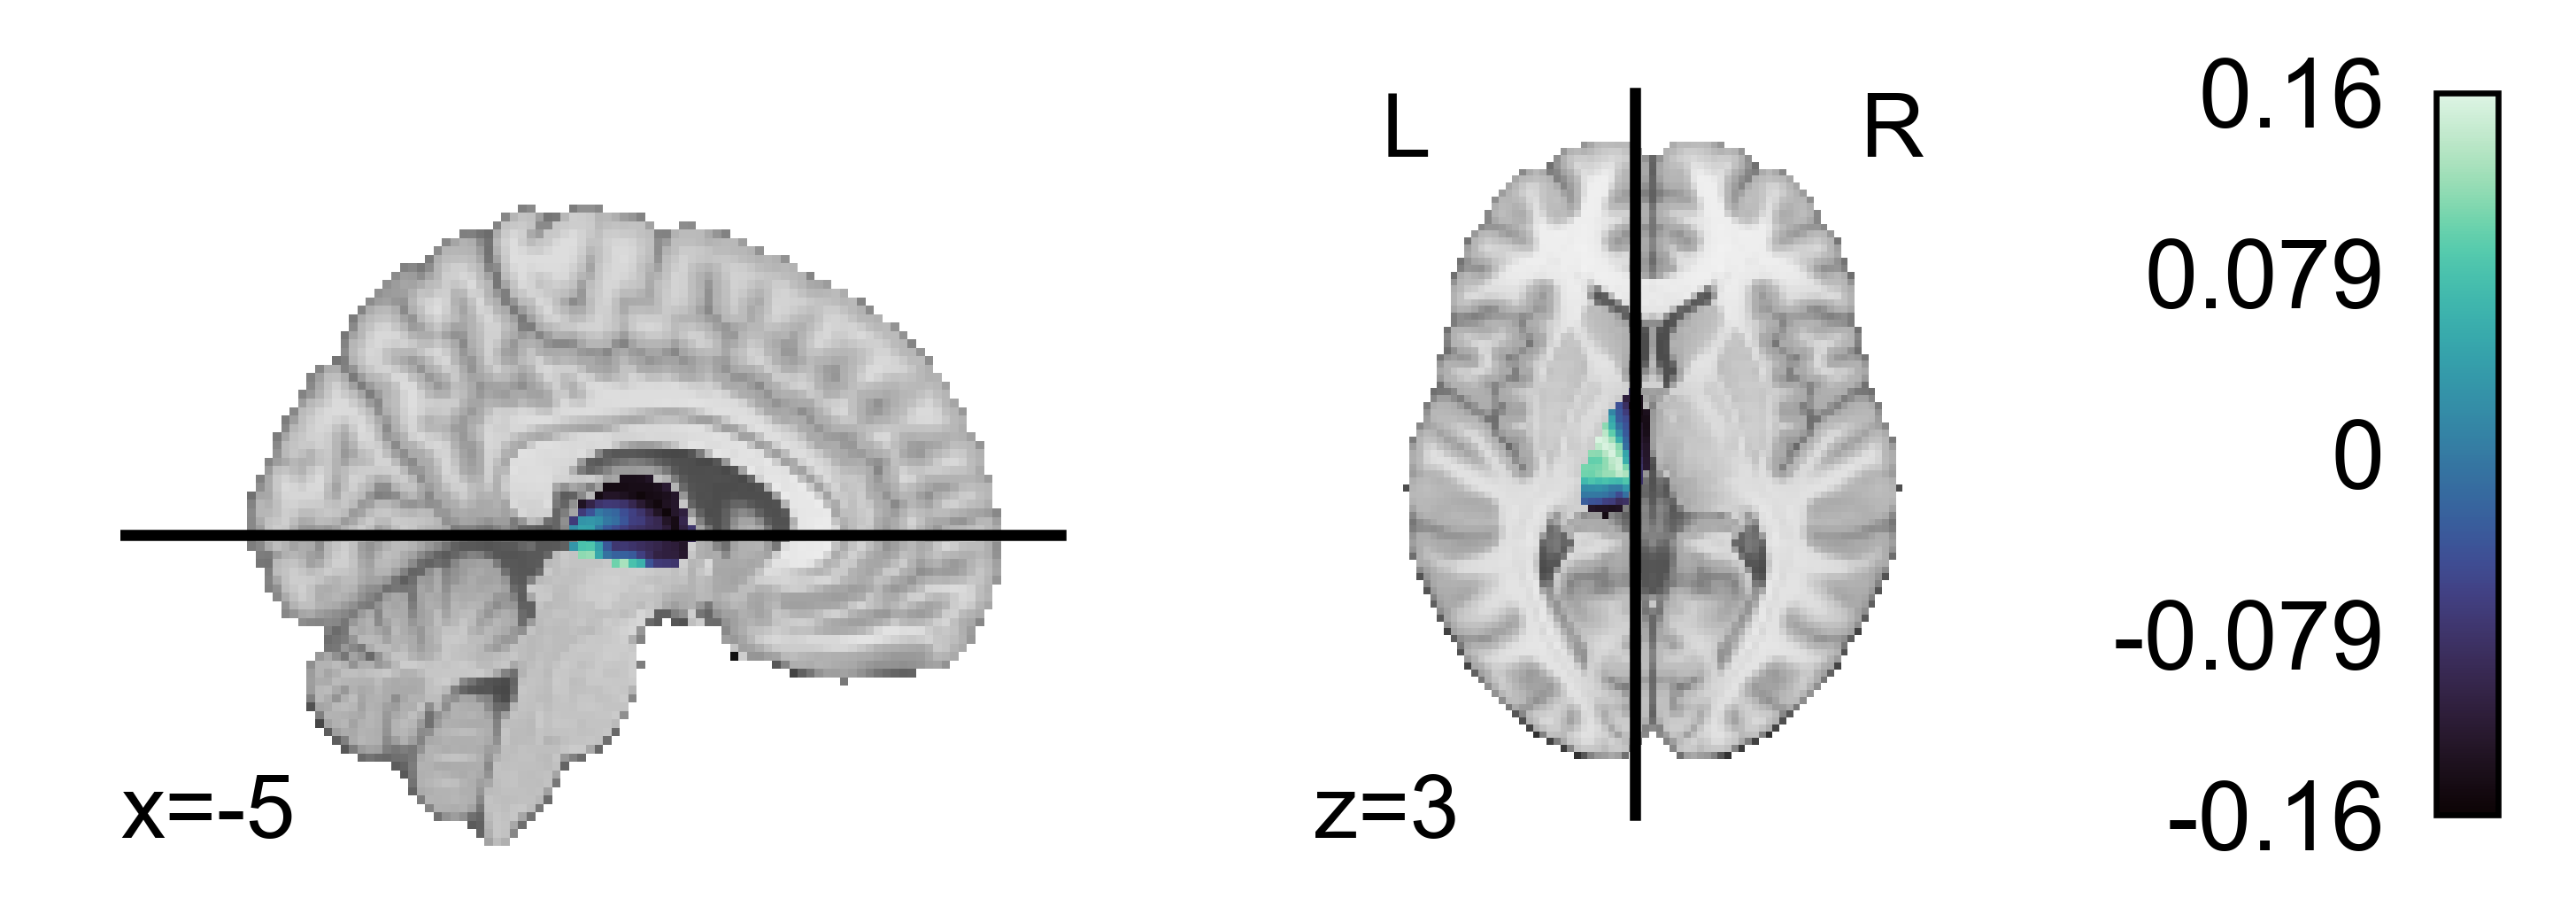

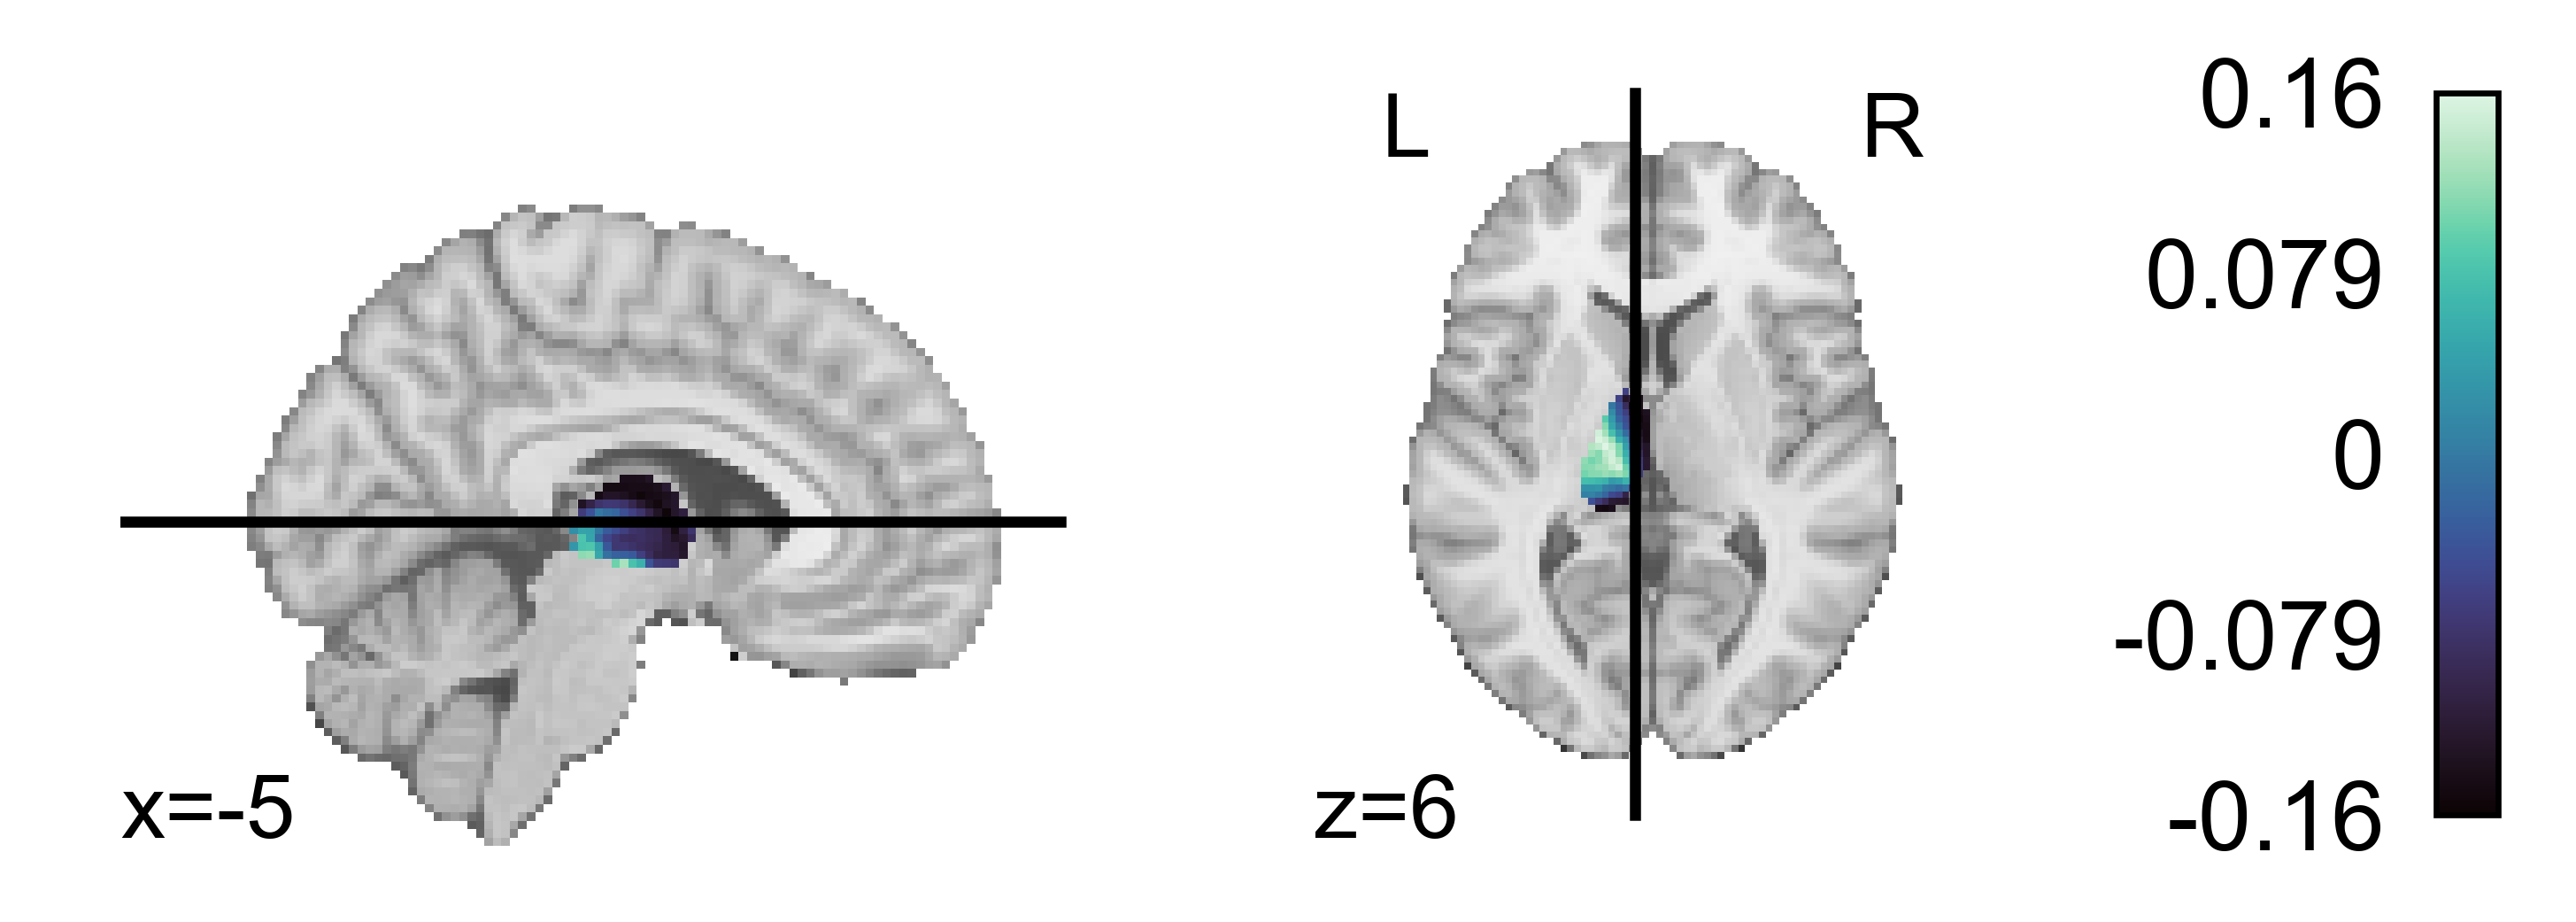

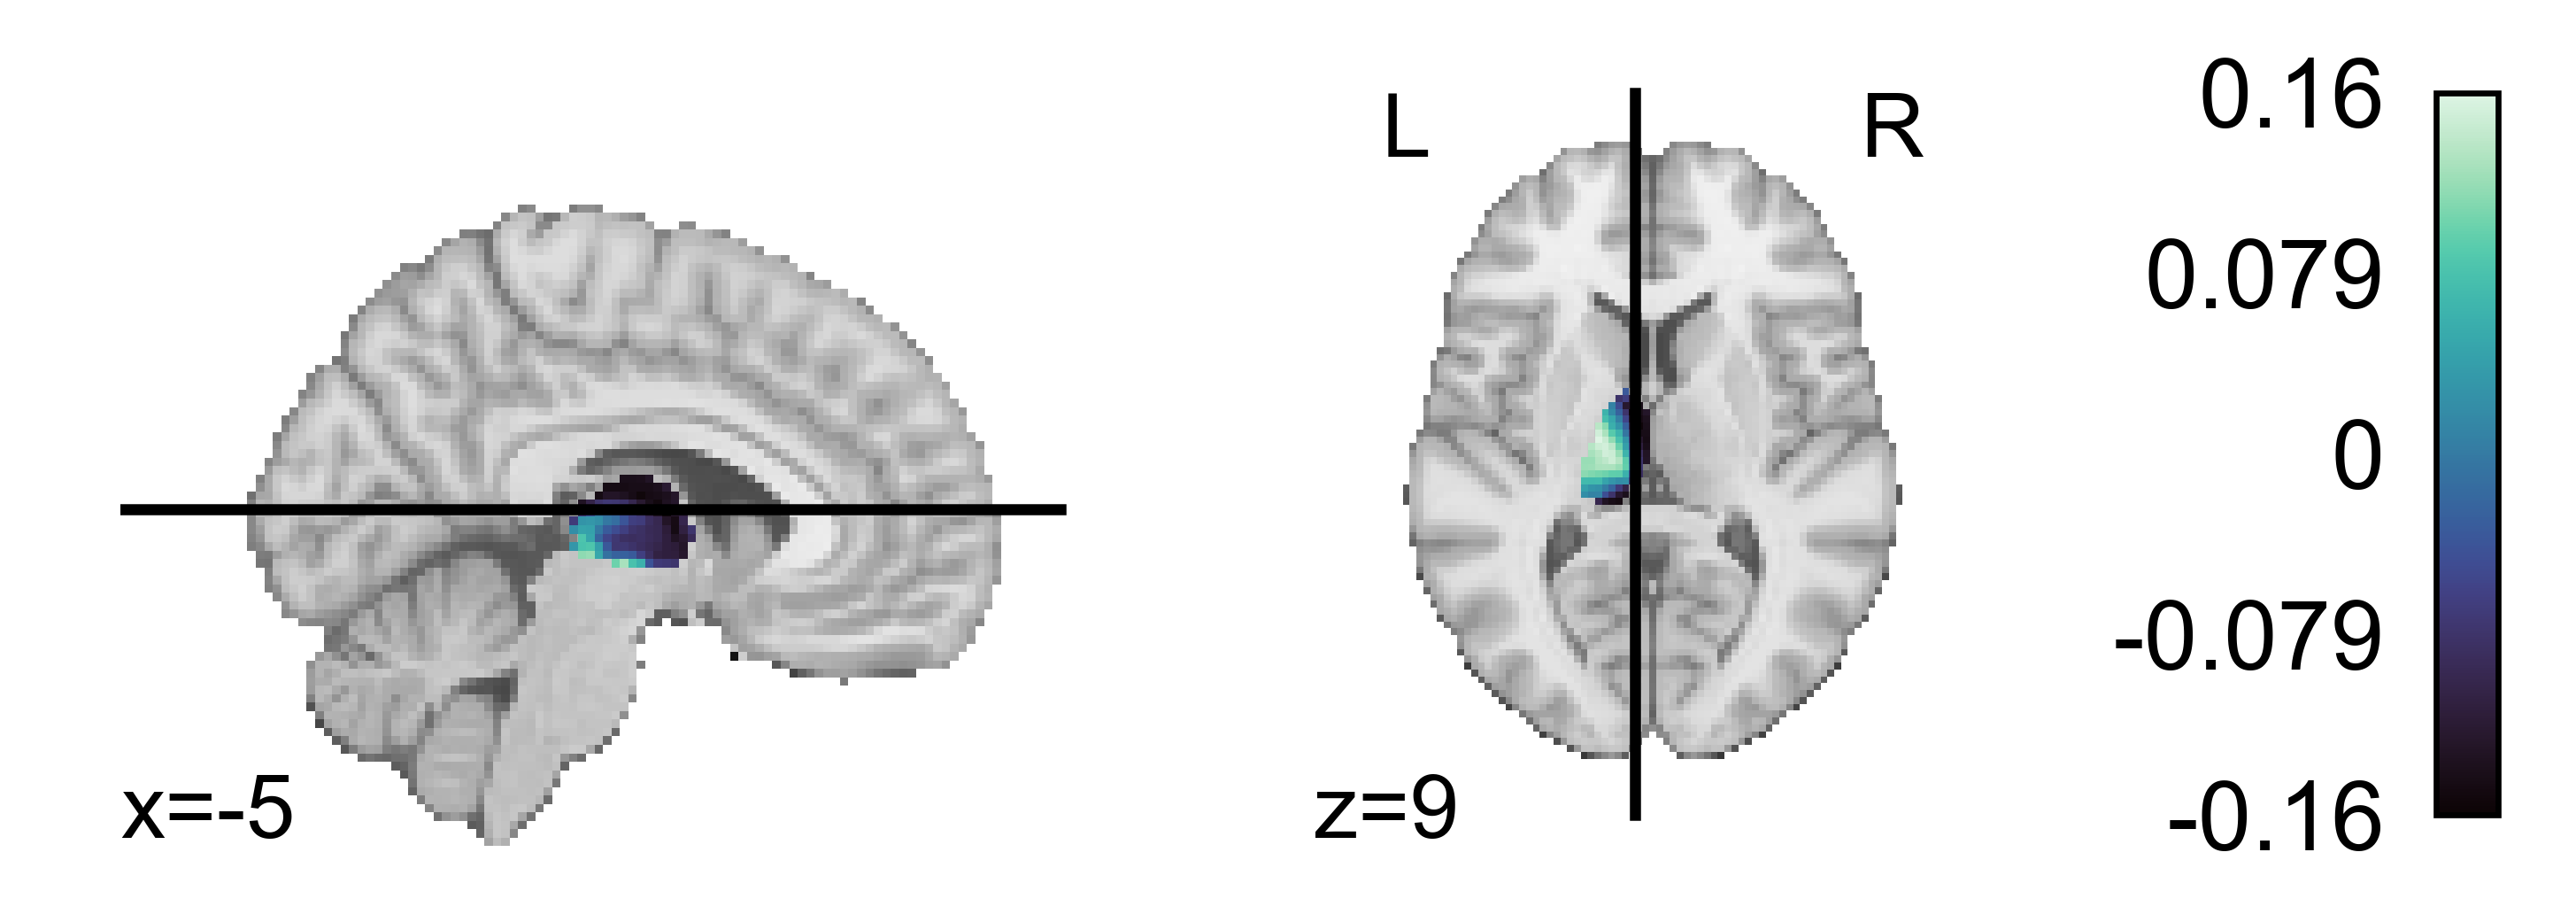

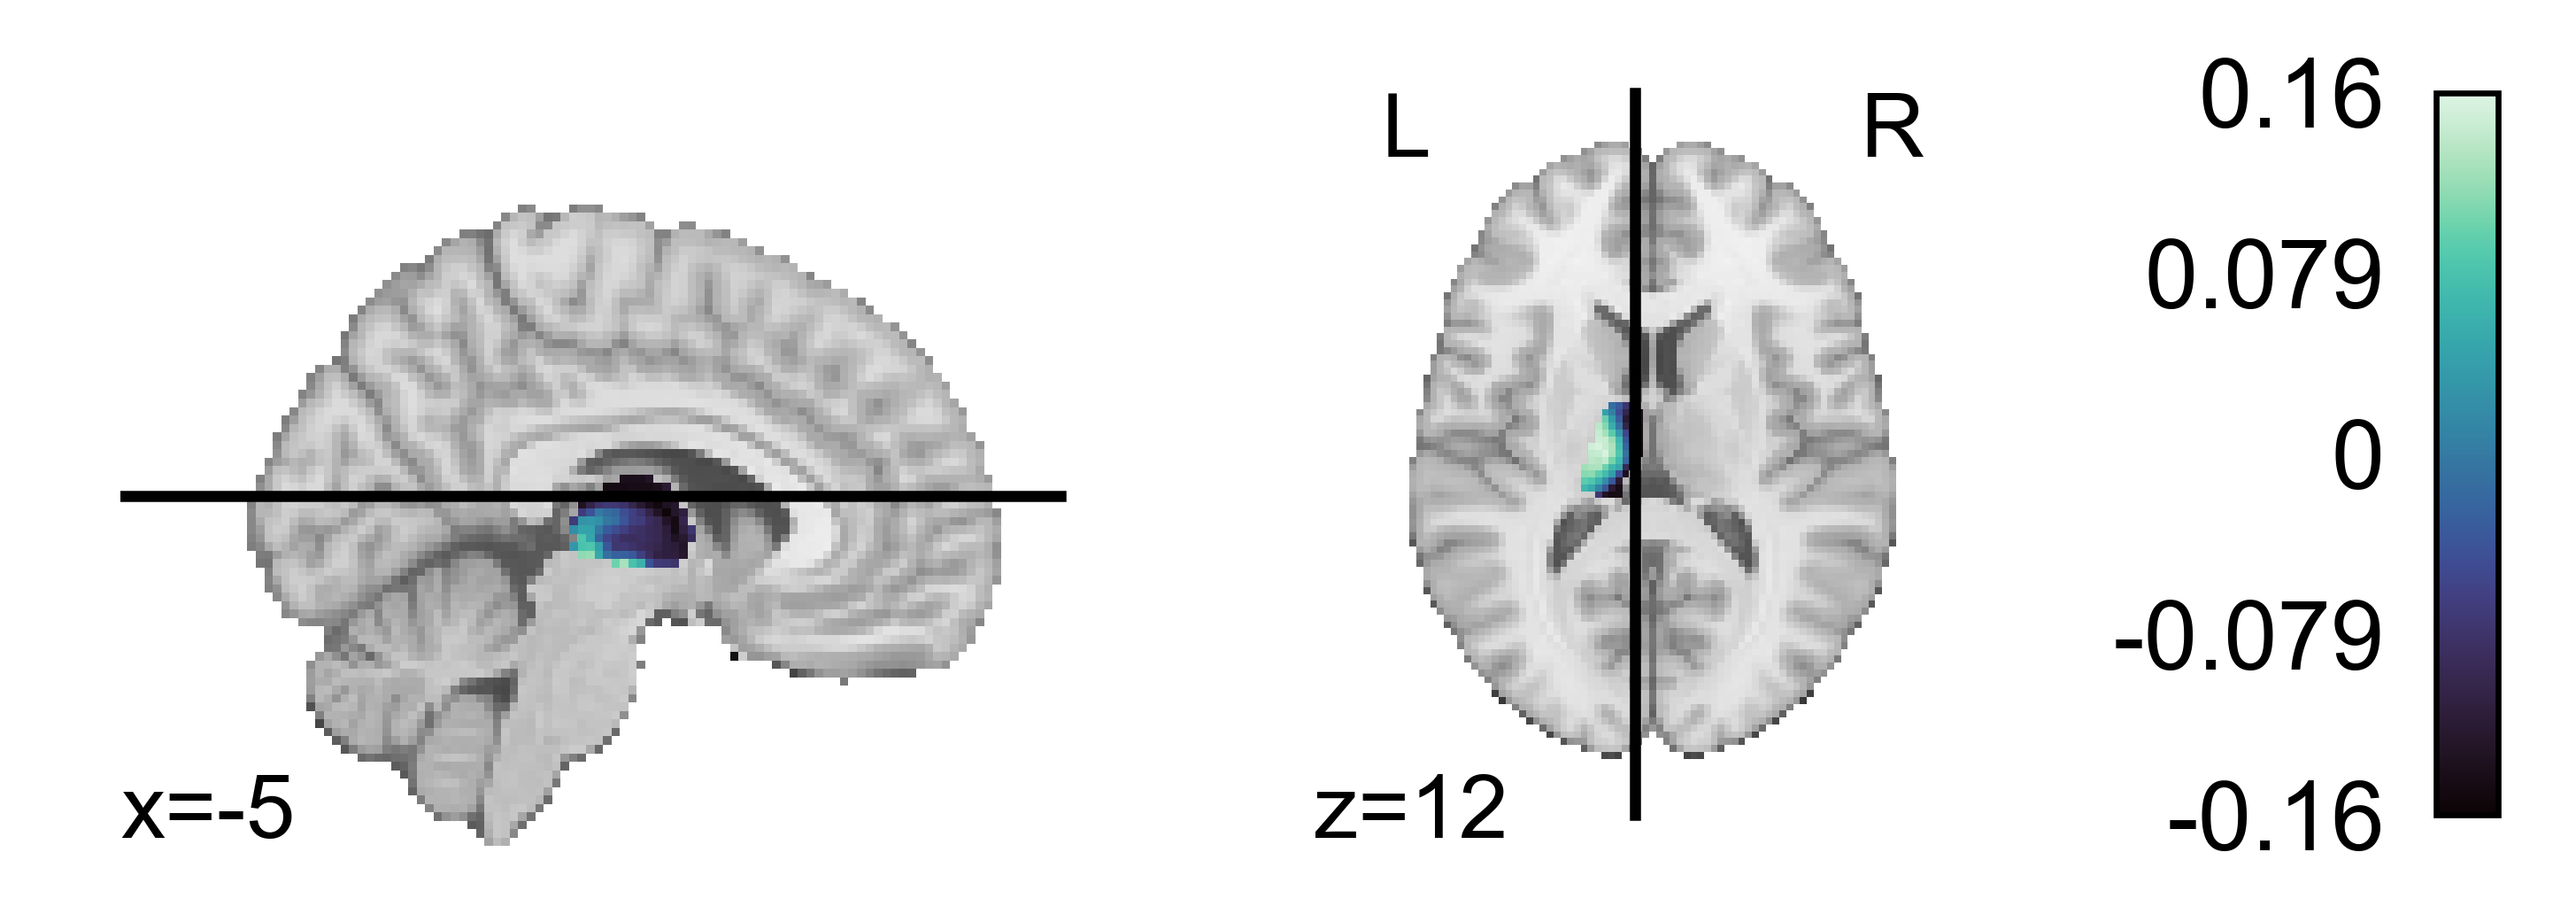

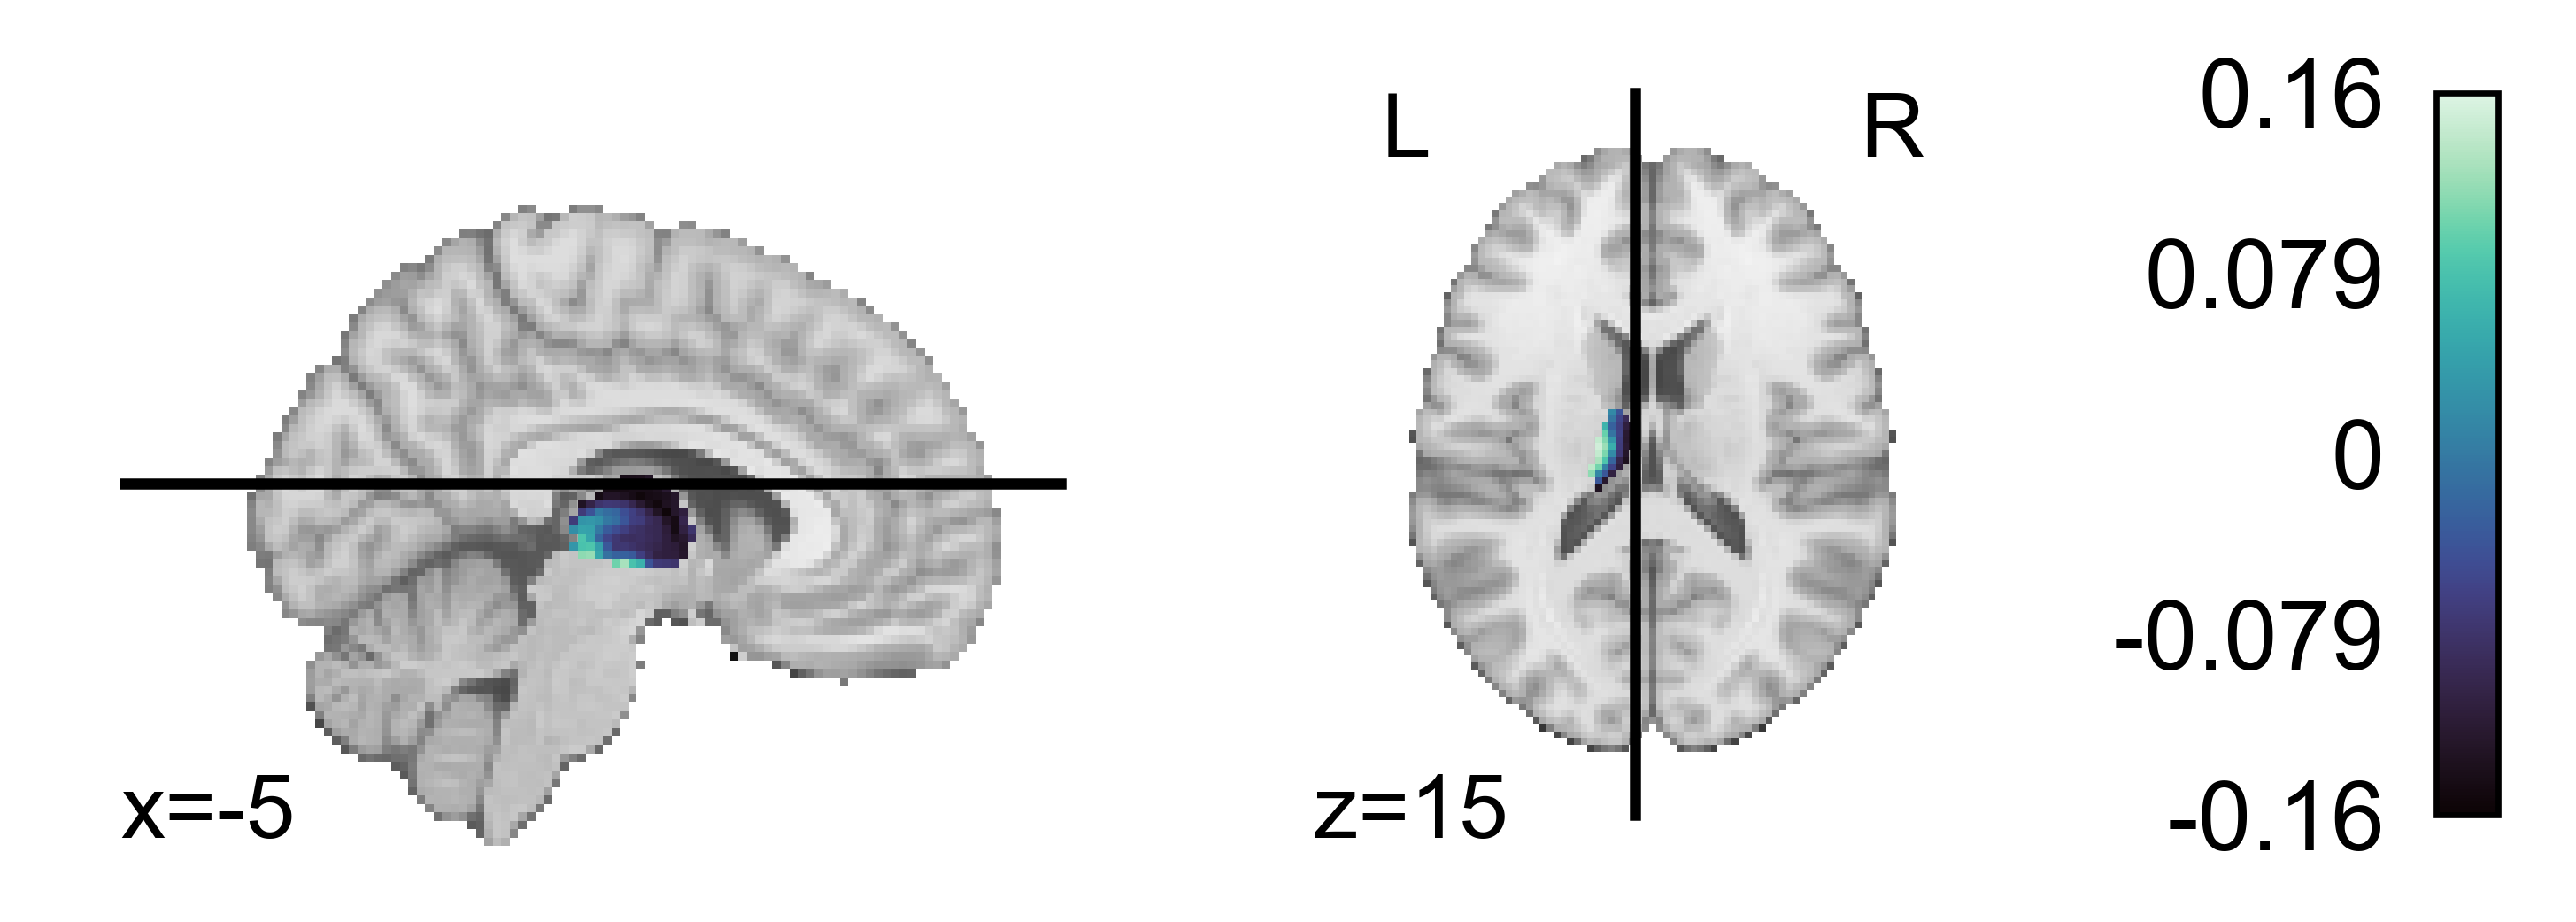

In [2]:
grad_tha_1="/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradient1_left_tha.nii.gz"

slice_z=(0,3,6,9,12,15)

for i , z in enumerate(slice_z):
    fig, ax = plt.subplots(1, figsize=(6, 2), dpi=600)
    display= plotting.plot_stat_map(grad_tha_1, display_mode="xz", 
                                cmap="mako", 
                                symmetric_cbar=True,
                                colorbar=True,
                                draw_cross=True, 
                                figure=fig, axes=ax,
                                dim=0.1,
                                cut_coords=[-5,z])   #hinterer Wert legt Schnitte in Z fest 
    display.savefig("/Project1_thalamus_gradients/plots/figure1/grad1_on_mni_z{}_lh.svg".format(z))
#cut_coords=[-22,-18]


## Gradient 2 plotted on the thalamus

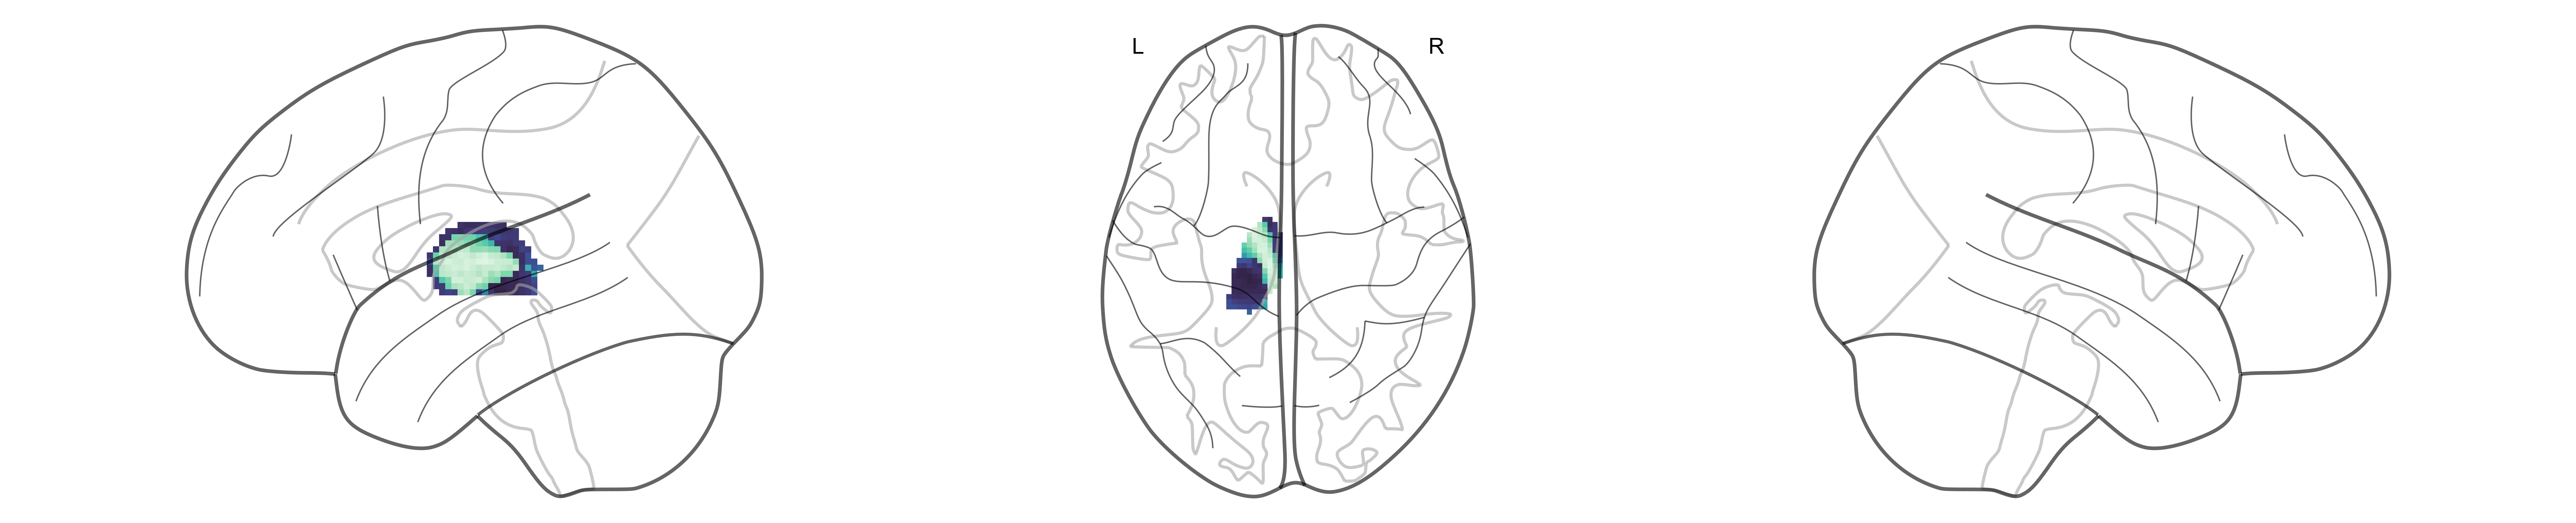

In [29]:
grad_tha_2="/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradient2_left_tha.nii.gz"

fig, ax = plt.subplots(1, figsize=(25,5), dpi=600)
display=plotting.plot_glass_brain(grad_tha_2, display_mode="lzr",
                                  figure=fig, axes=ax,
                                  colorbar=False, plot_abs=False, 
                                  symmetric_cbar=False, 
                                  cmap="mako",
                                  alpha=0.6)
display.savefig("/data/p_02666/Project1_thalamus/plots/figure1/grad2_glassbrain_lh.svg")

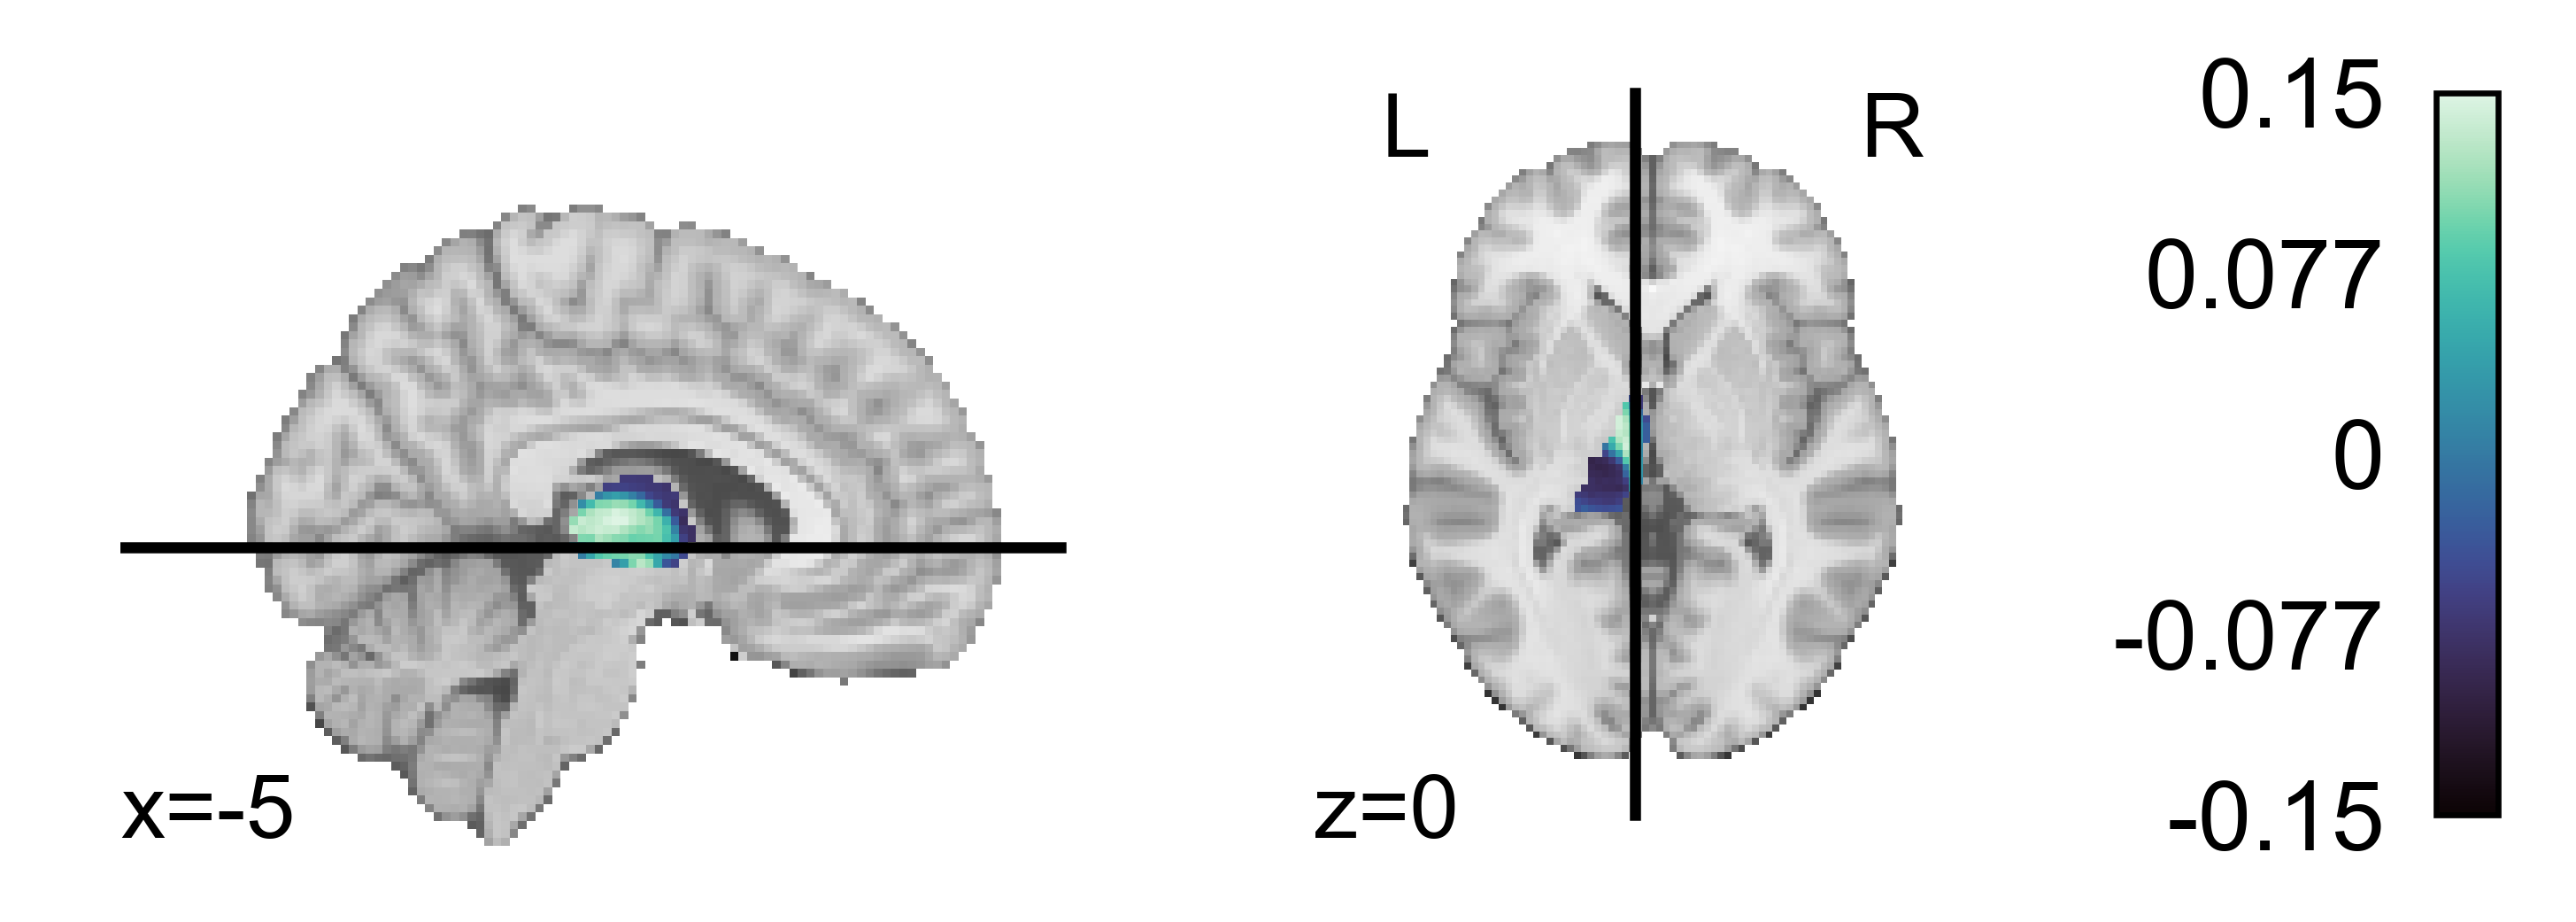

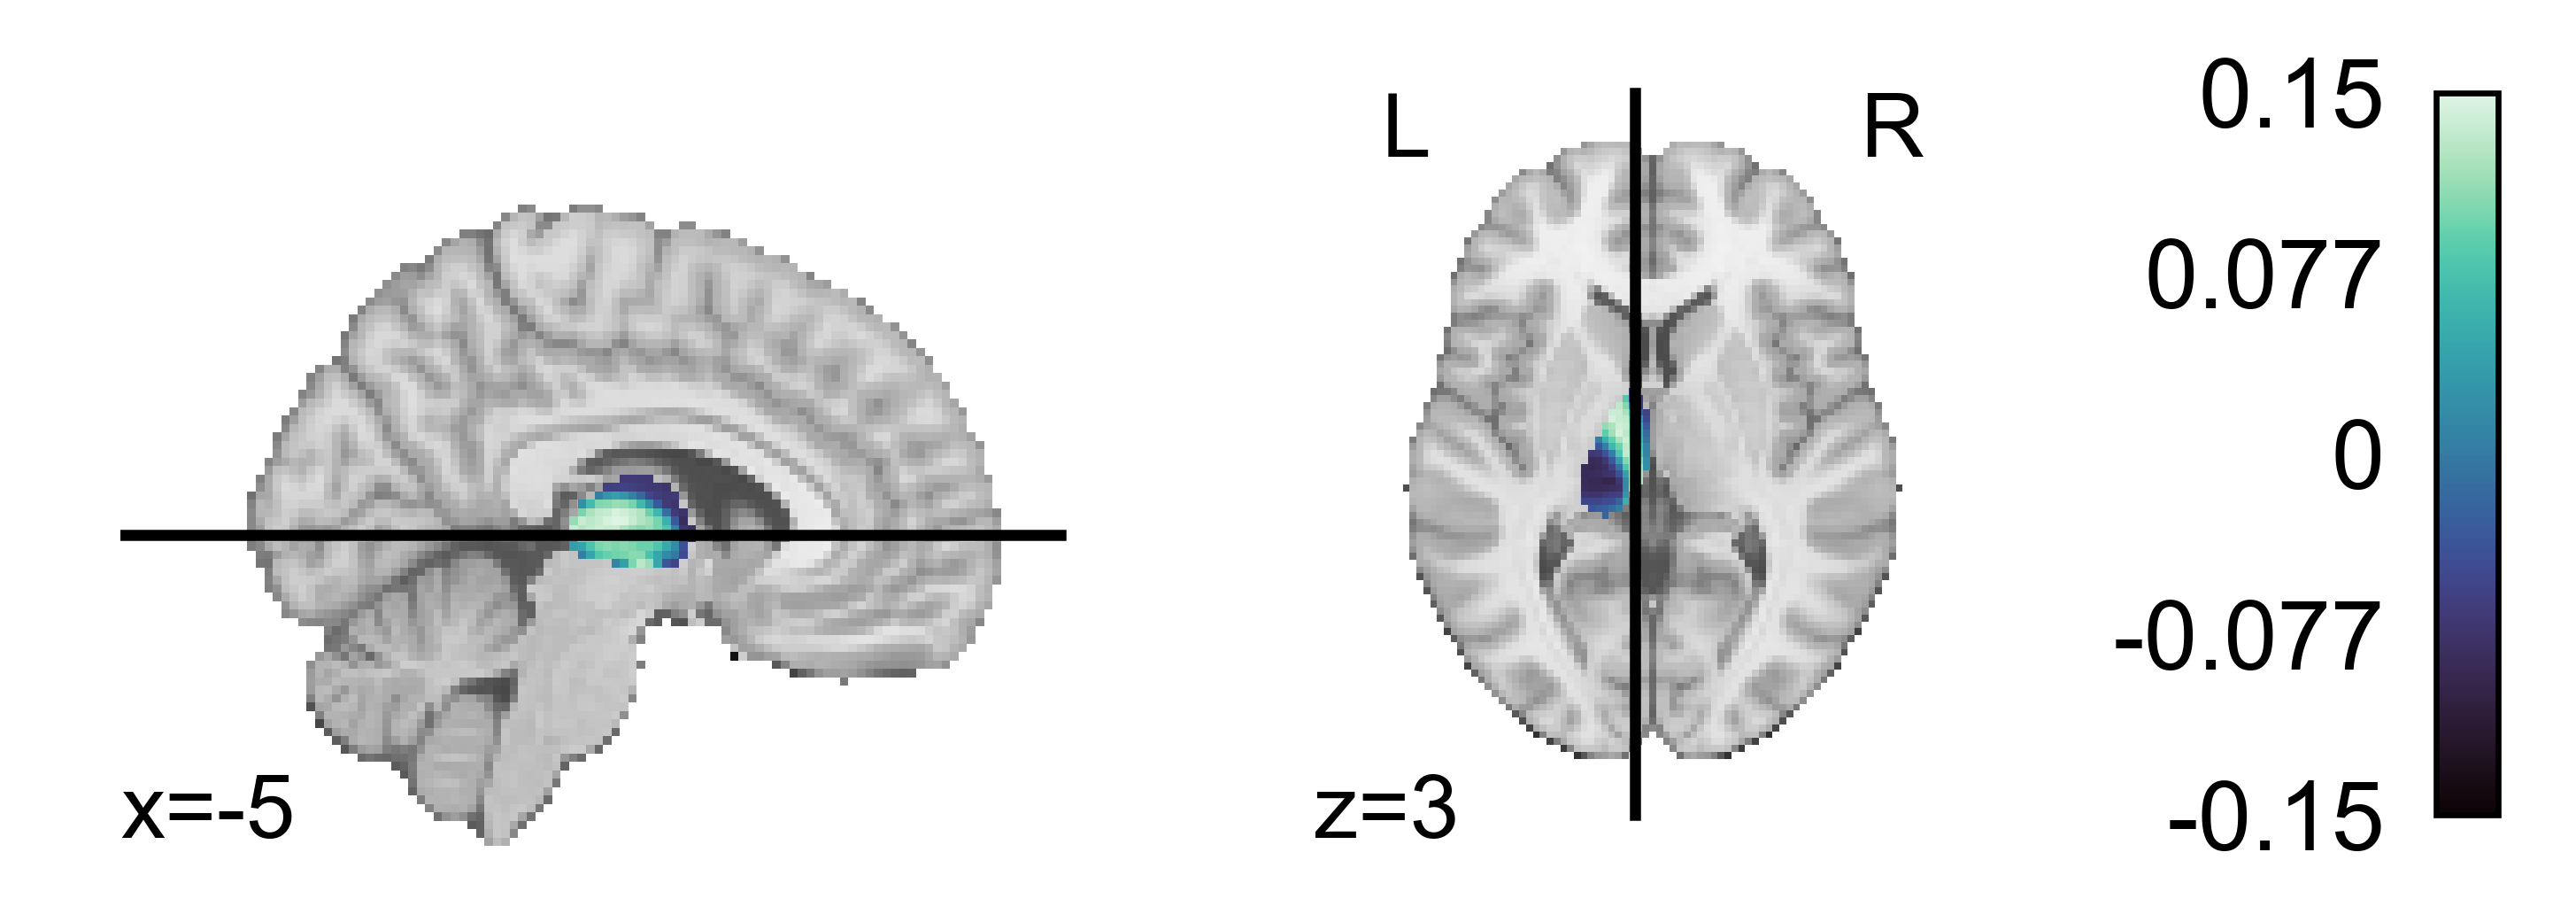

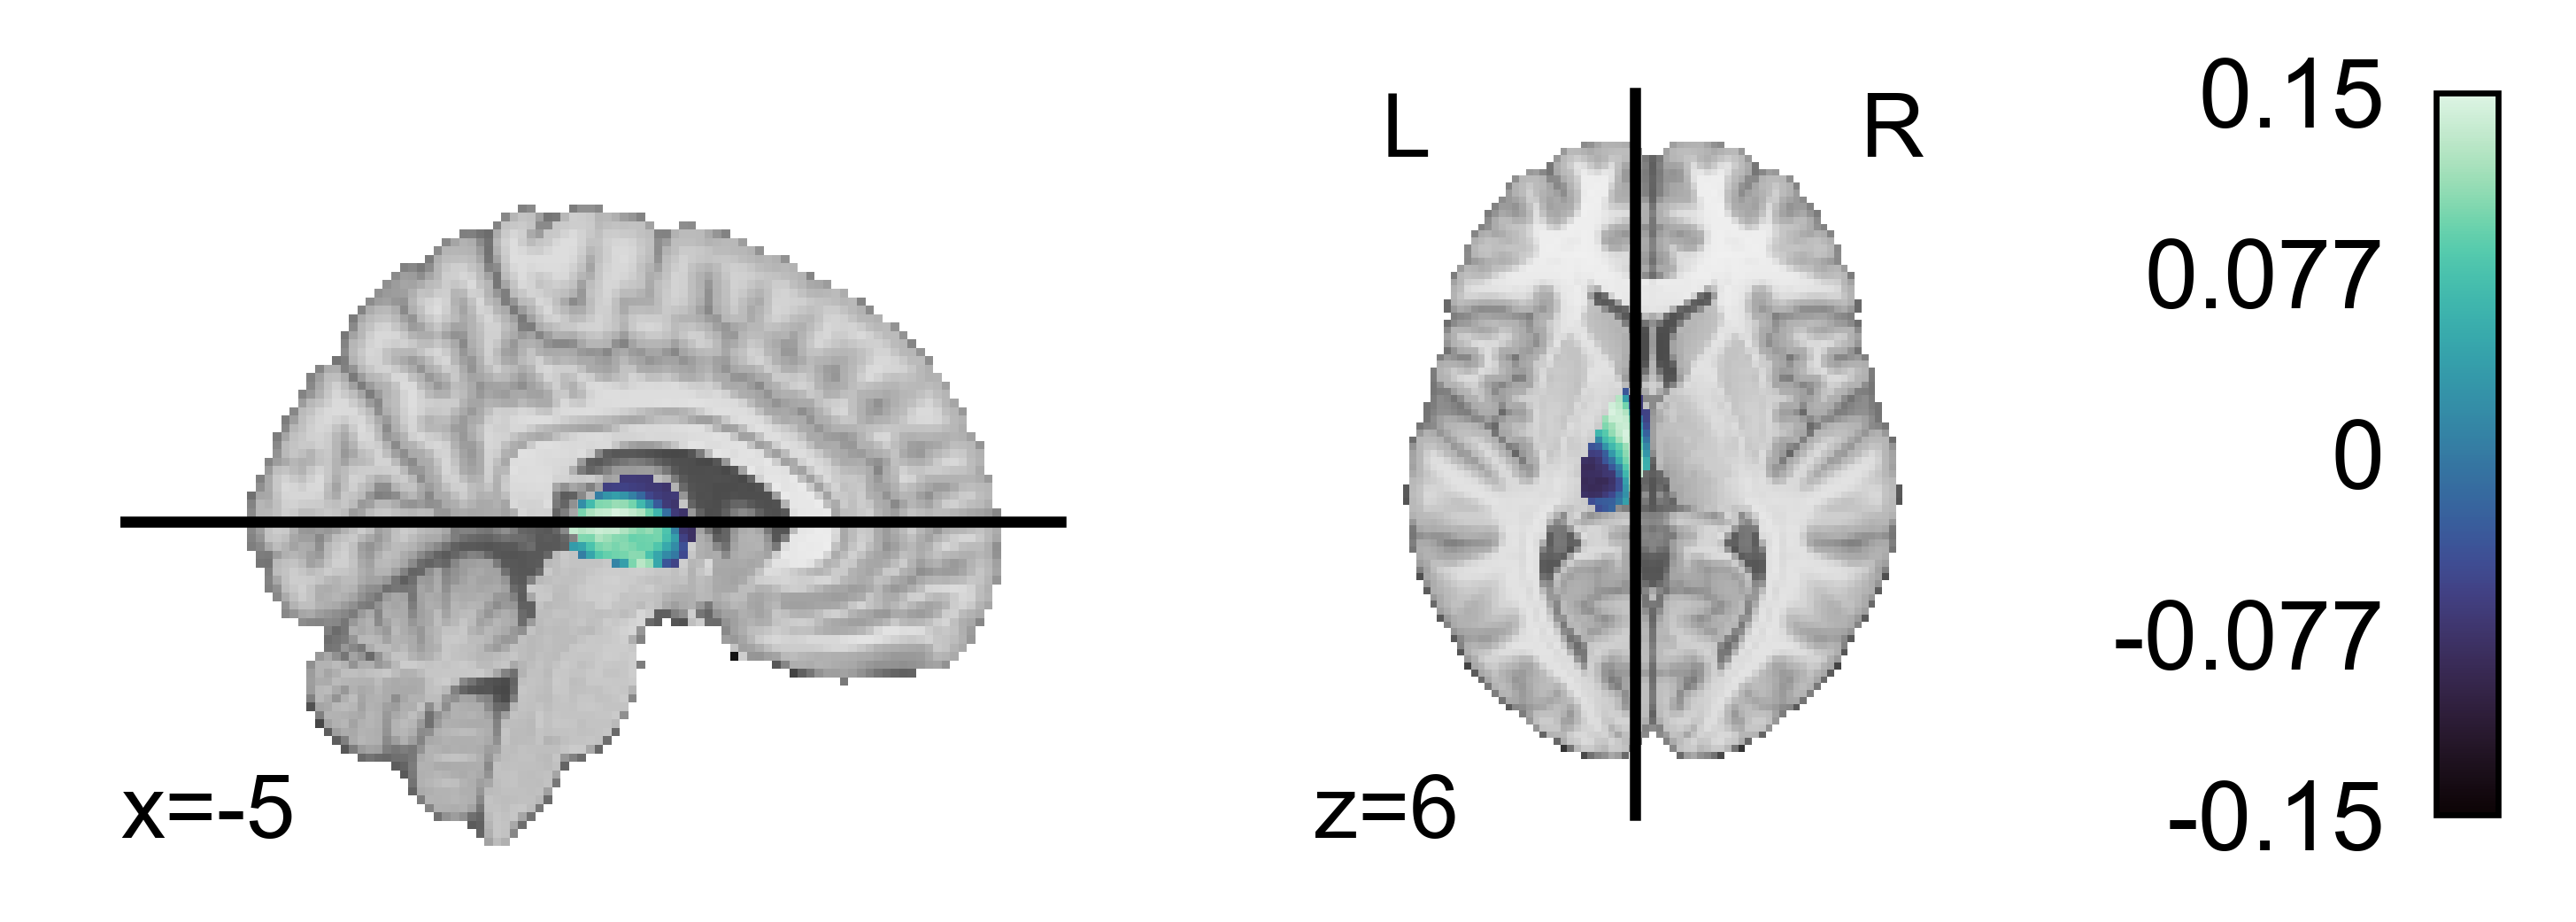

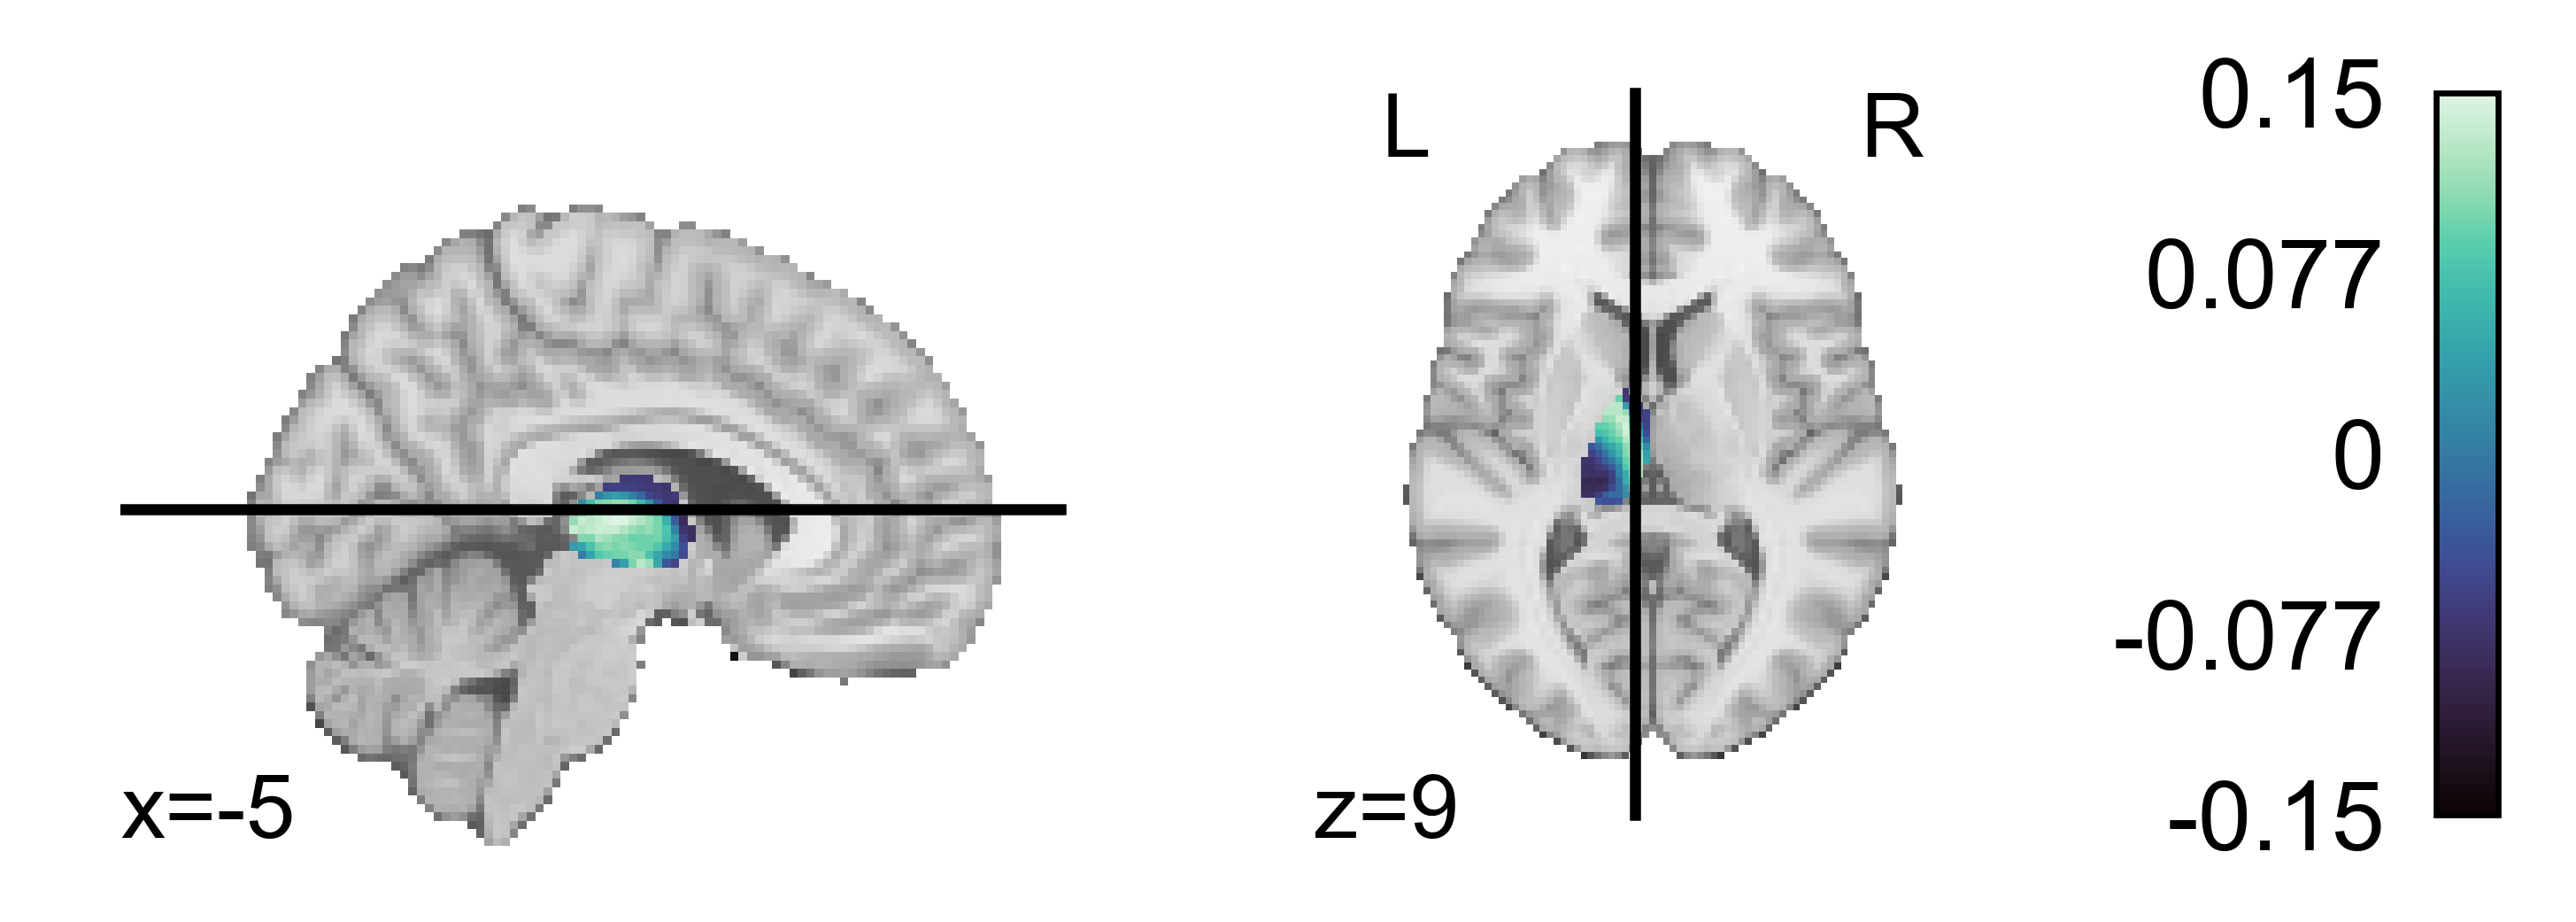

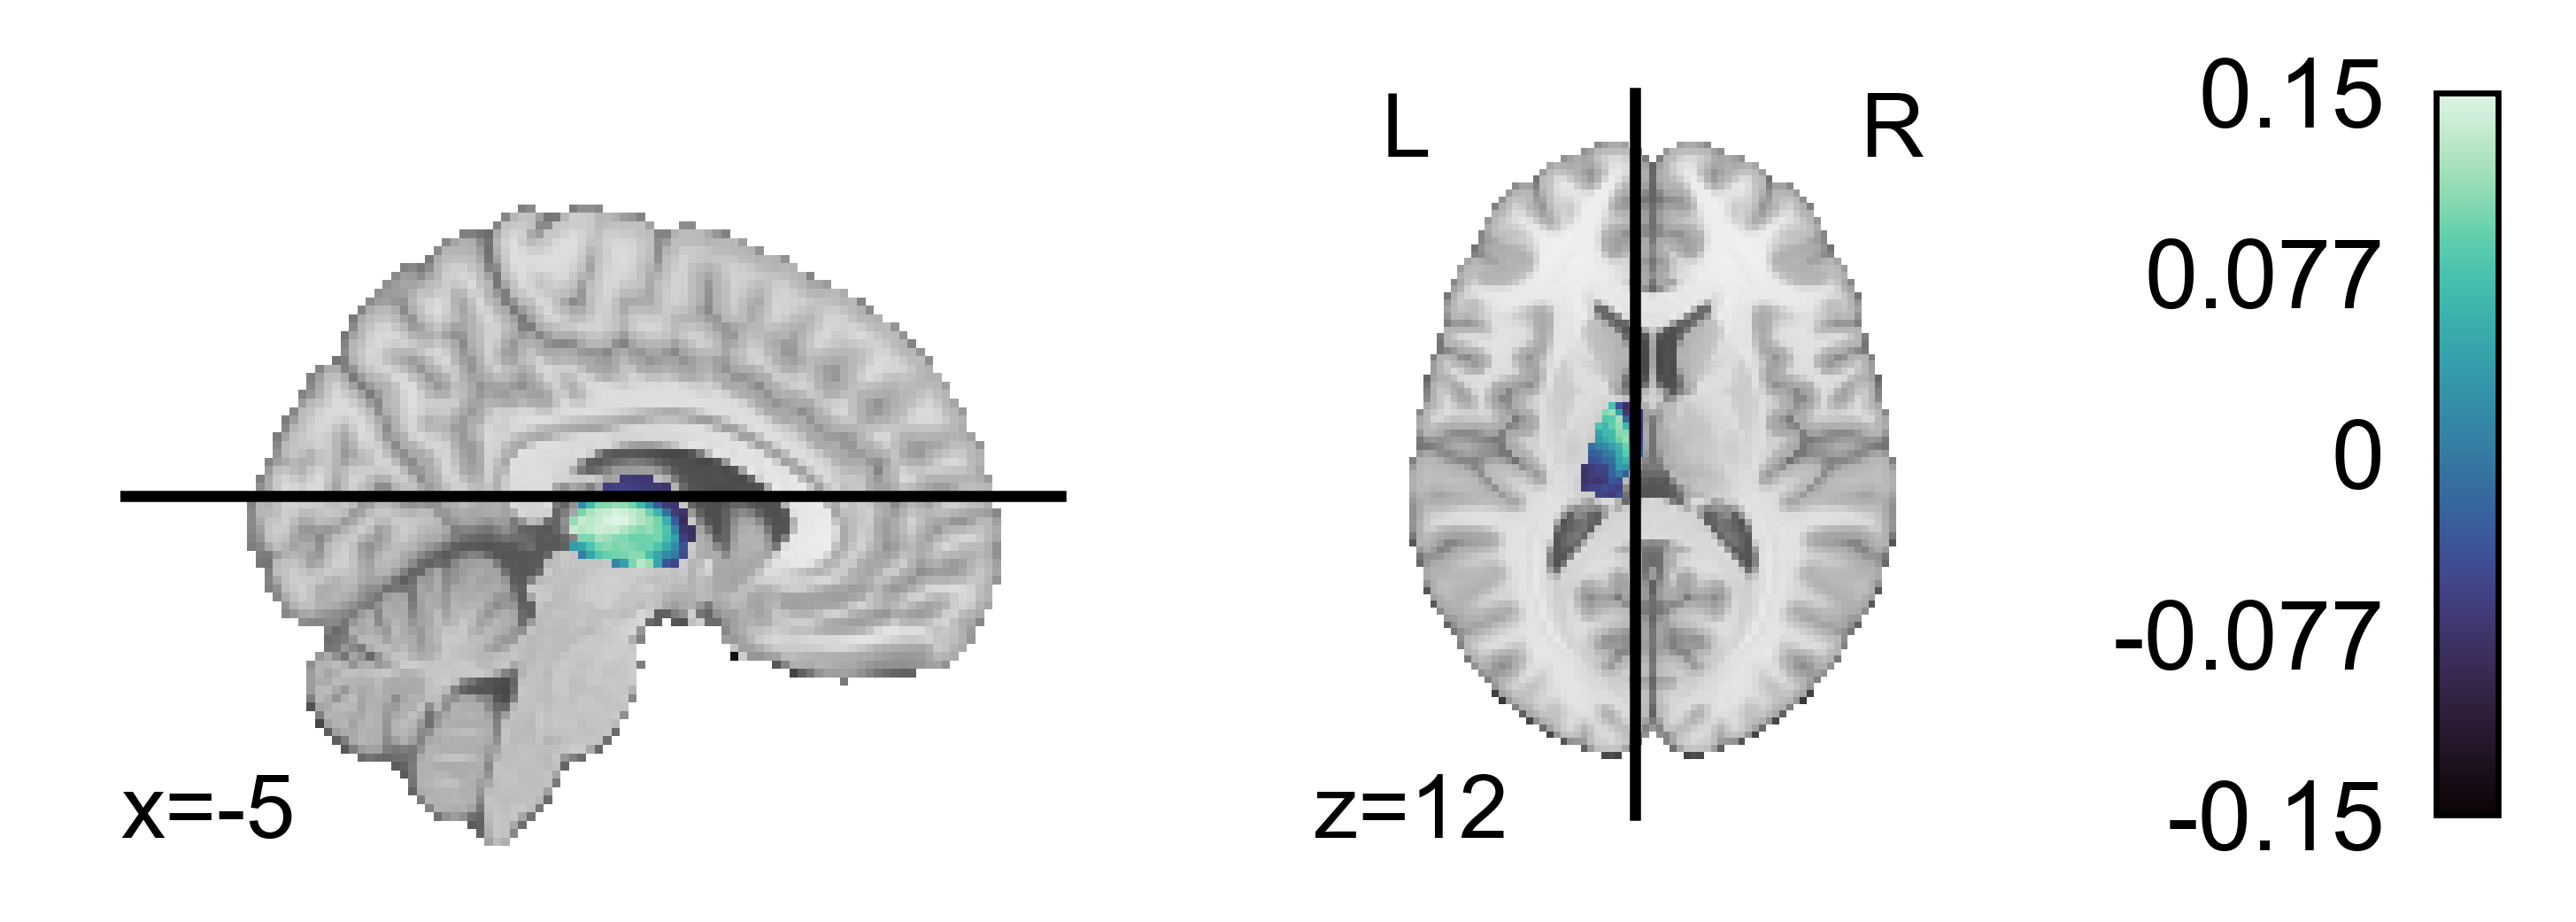

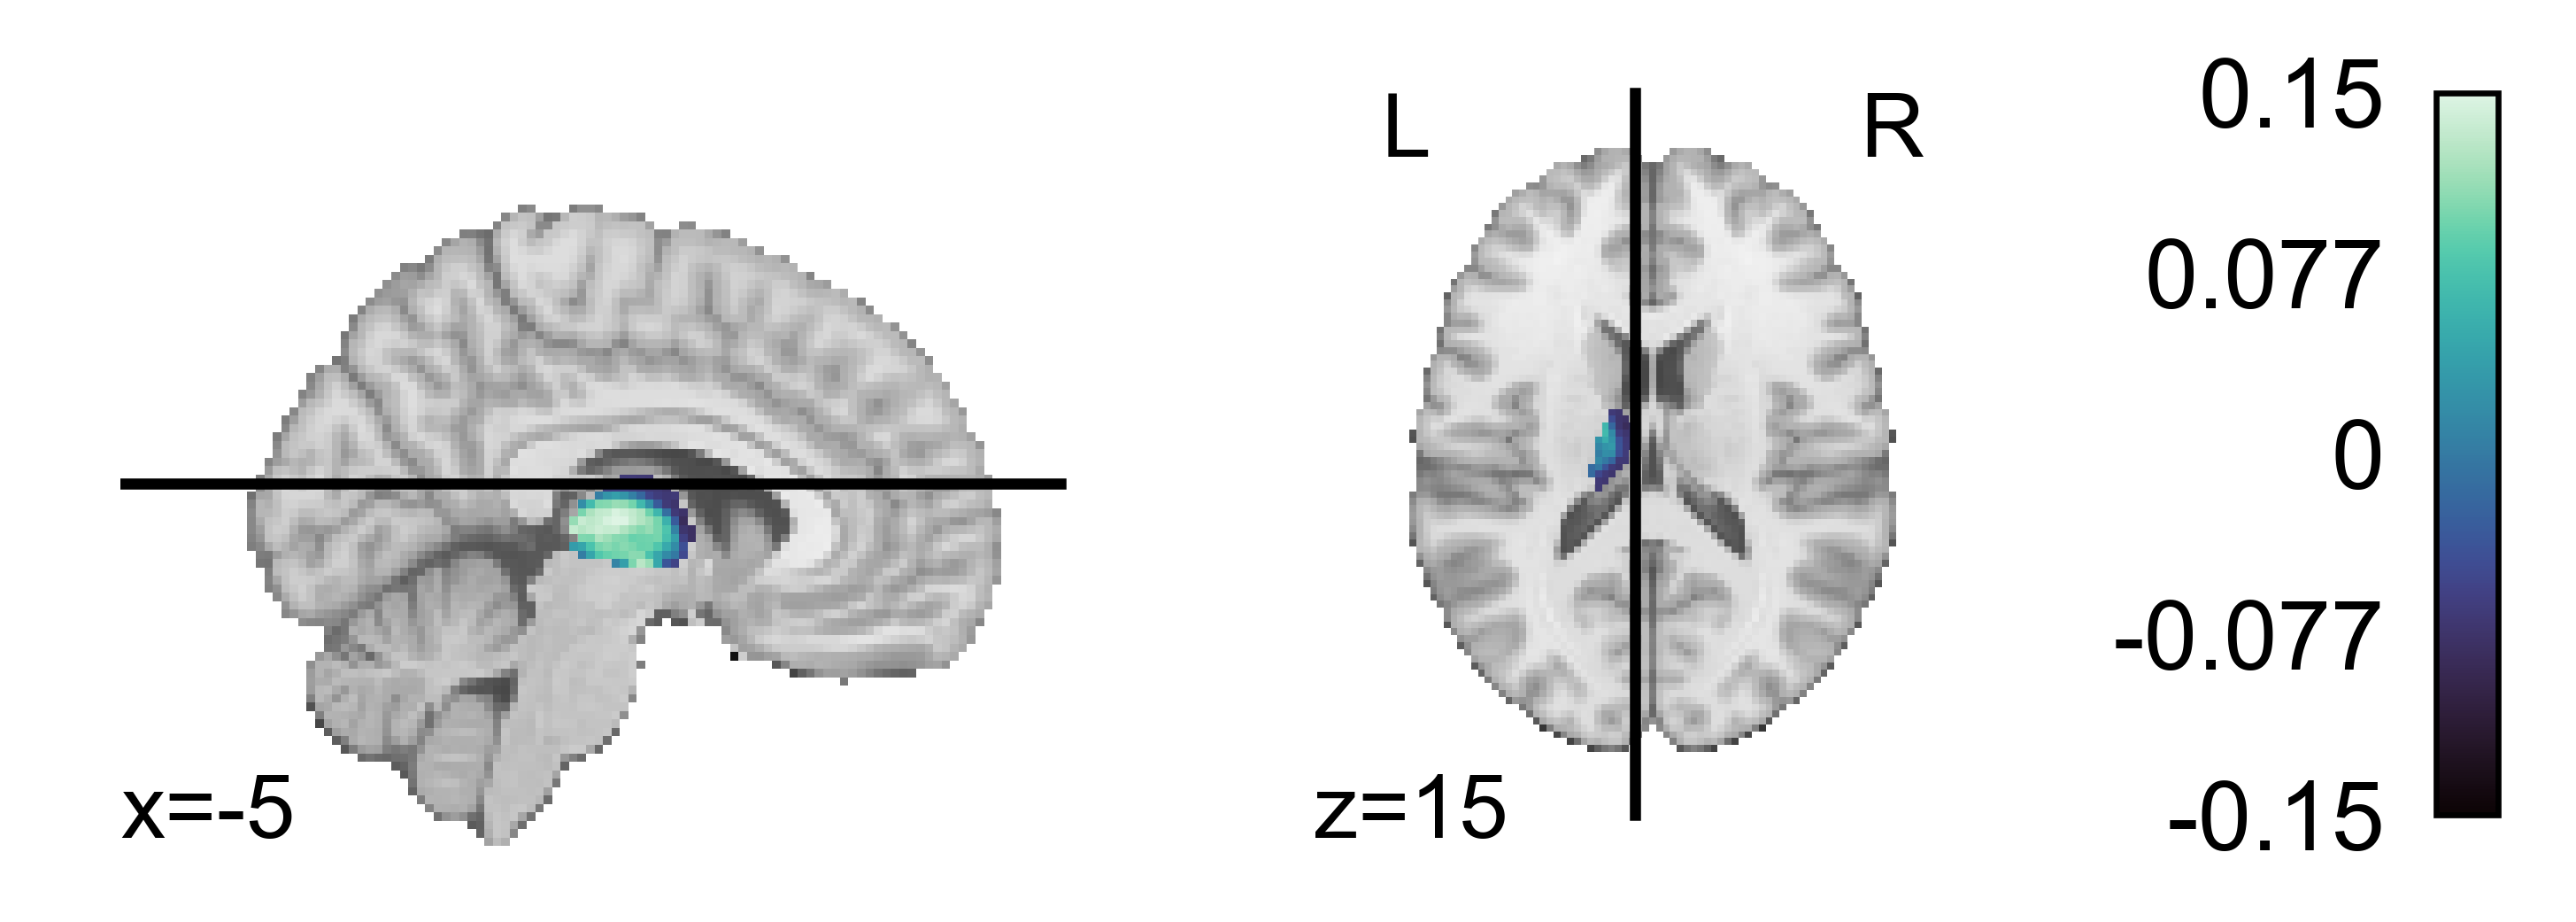

In [4]:
# plot it for all z slices you want to show (0,3,6,9,12,15)
slice_z=(0,3,6,9,12,15)
grad_tha_2="/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradient2_left_tha.nii.gz"

for i , z in enumerate(slice_z):
    fig, ax = plt.subplots(1, figsize=(6, 2), dpi=600)
    display= plotting.plot_stat_map(grad_tha_2, display_mode="xz", 
                                cmap="mako",
                                symmetric_cbar=True,
                                colorbar=True,
                                draw_cross=True, 
                                figure=fig, axes=ax,
                                dim=0.1,
                                cut_coords=[-5,z])   #hinterer Wert legt Schnitte in Z fest (0,3,6,9,12,15)
    display.savefig("/Project1_thalamus_gradients/plots/figure1/grad2_on_mni_z{}_lh.svg".format(z))

## Right Hemishere

## Gradient 1 plotted on thalamus

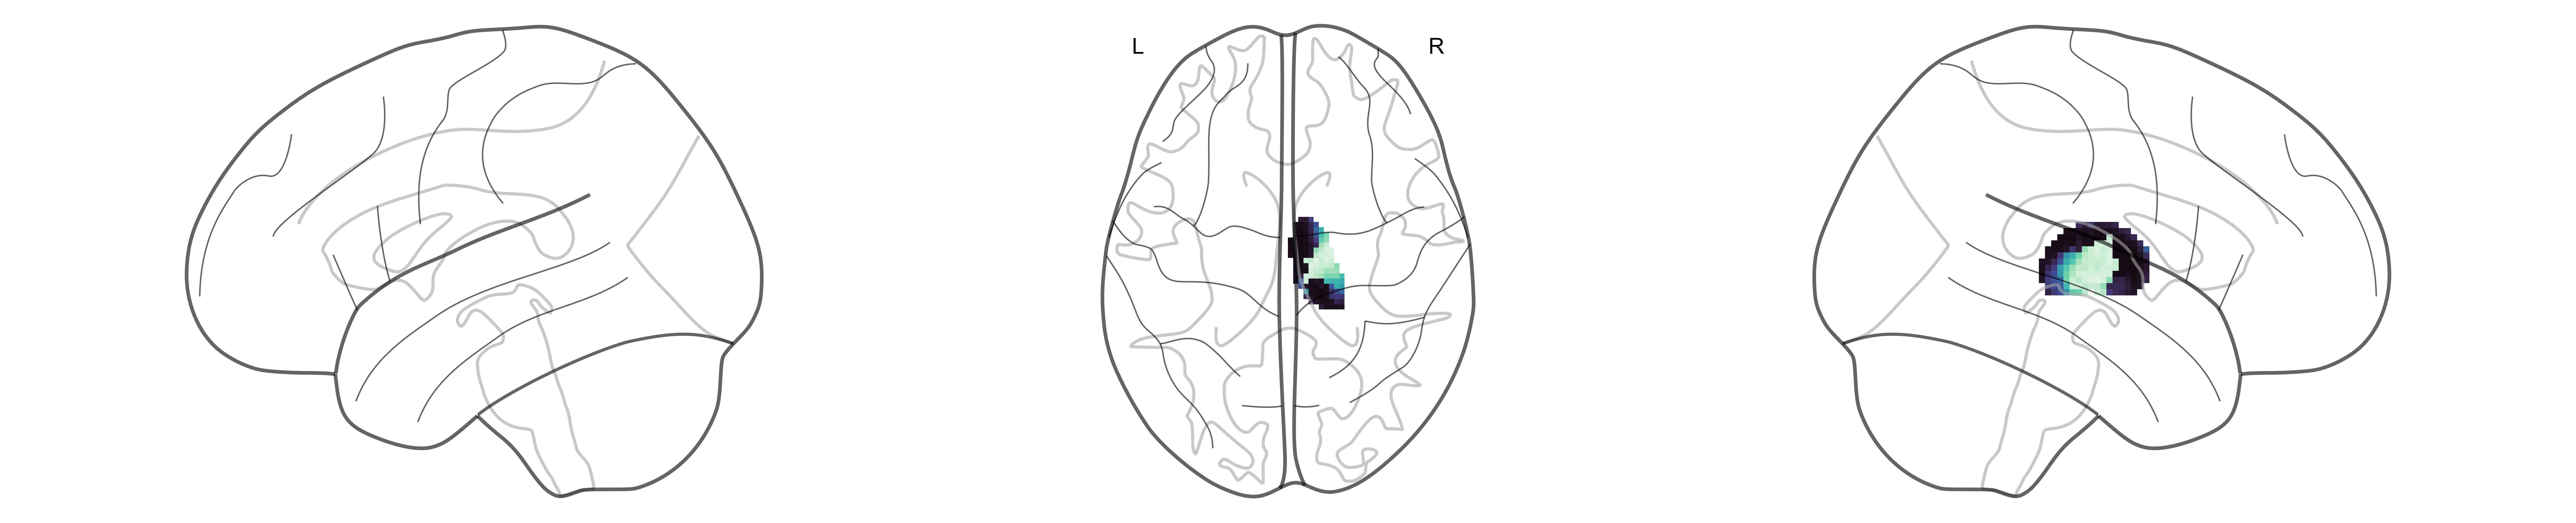

In [31]:
grad_tha_1="/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradient1_right_tha.nii.gz"

fig, ax = plt.subplots(1, figsize=(25,5), dpi=600)
display=plotting.plot_glass_brain(grad_tha_1, display_mode="lzr",
                                  figure=fig, axes=ax,
                                  colorbar=False, plot_abs=False, 
                                  symmetric_cbar=False, 
                                  cmap="mako",
                                  alpha=0.6)
display.savefig("/Project1_thalamus_gradients/plots/figure1/grad1_glassbrain_rh.svg")


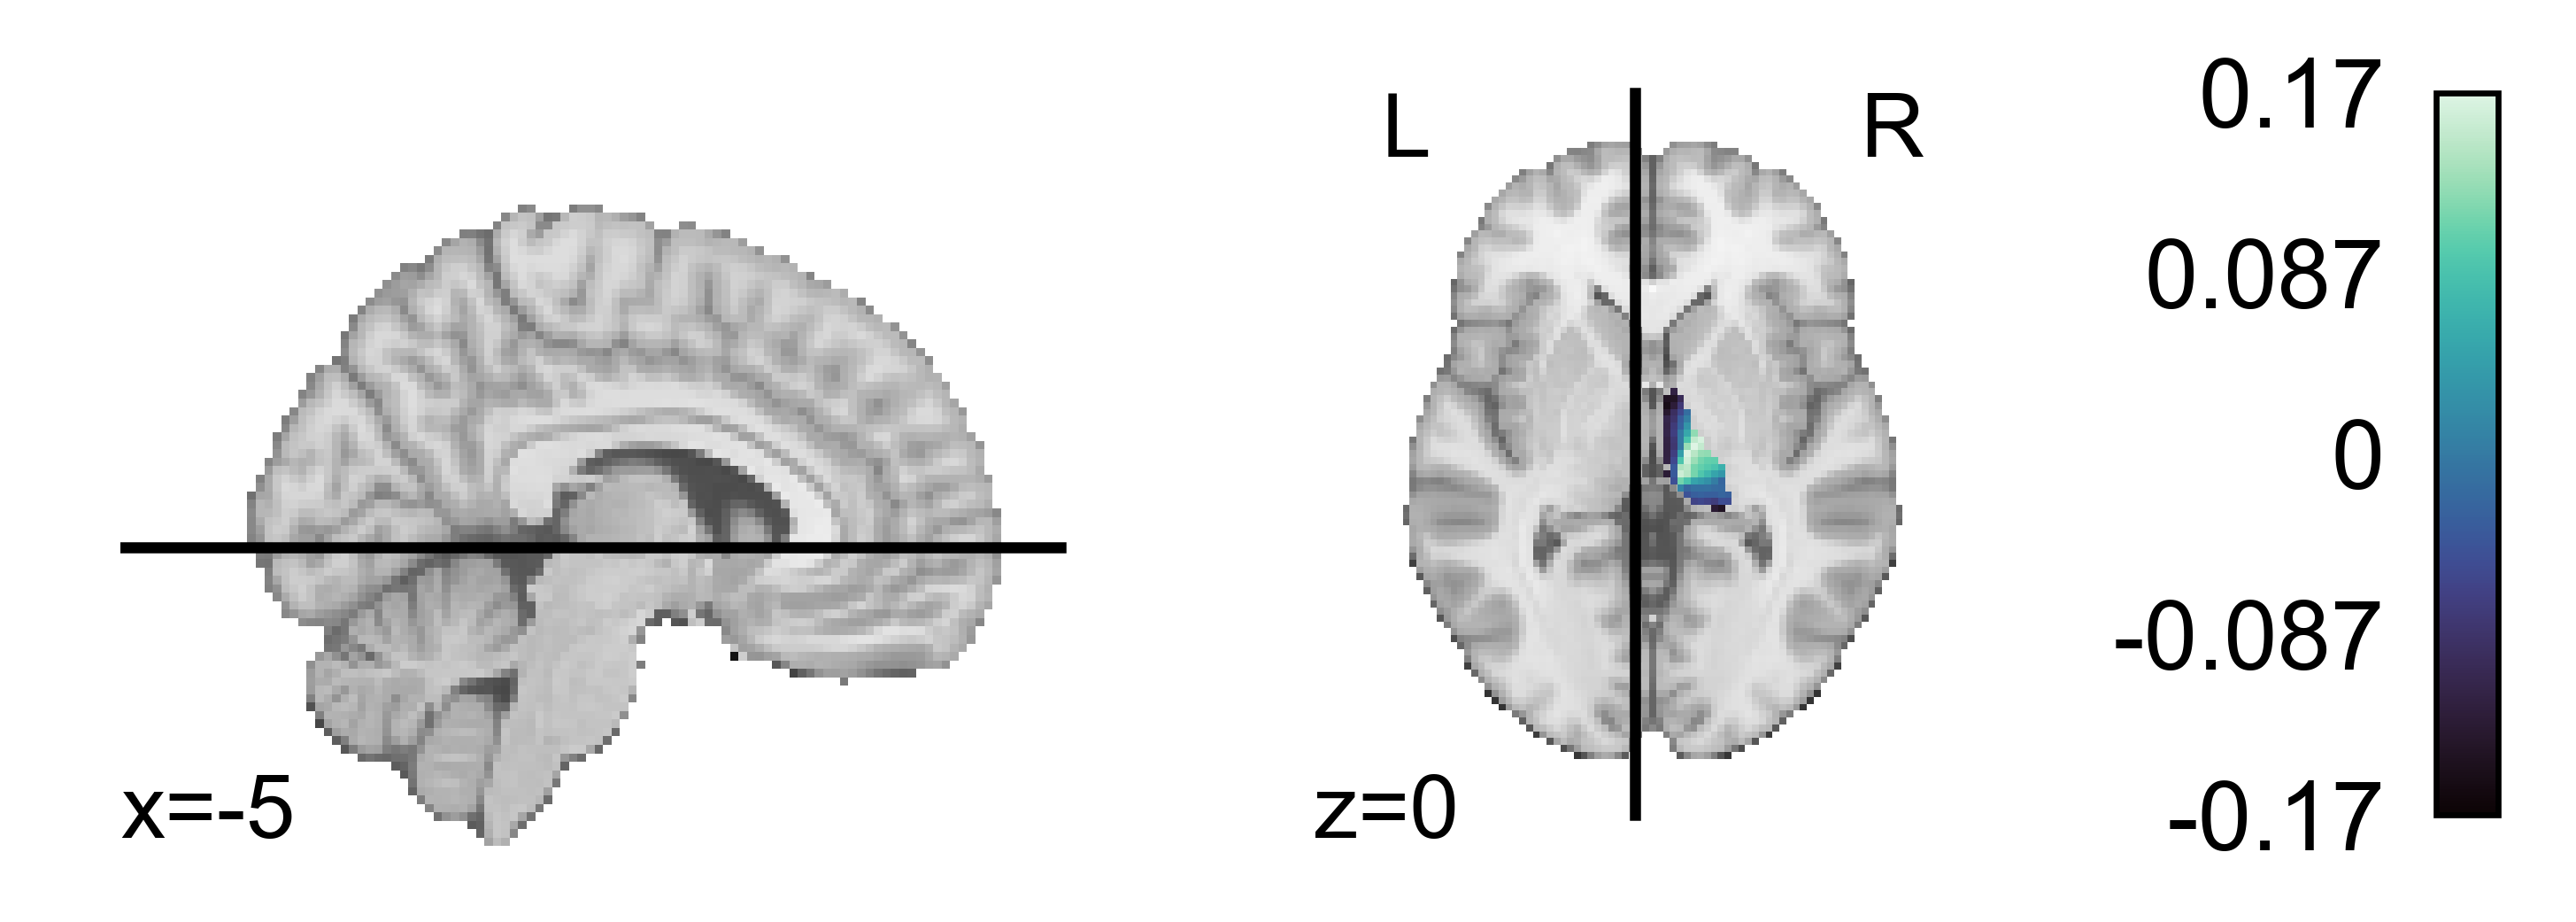

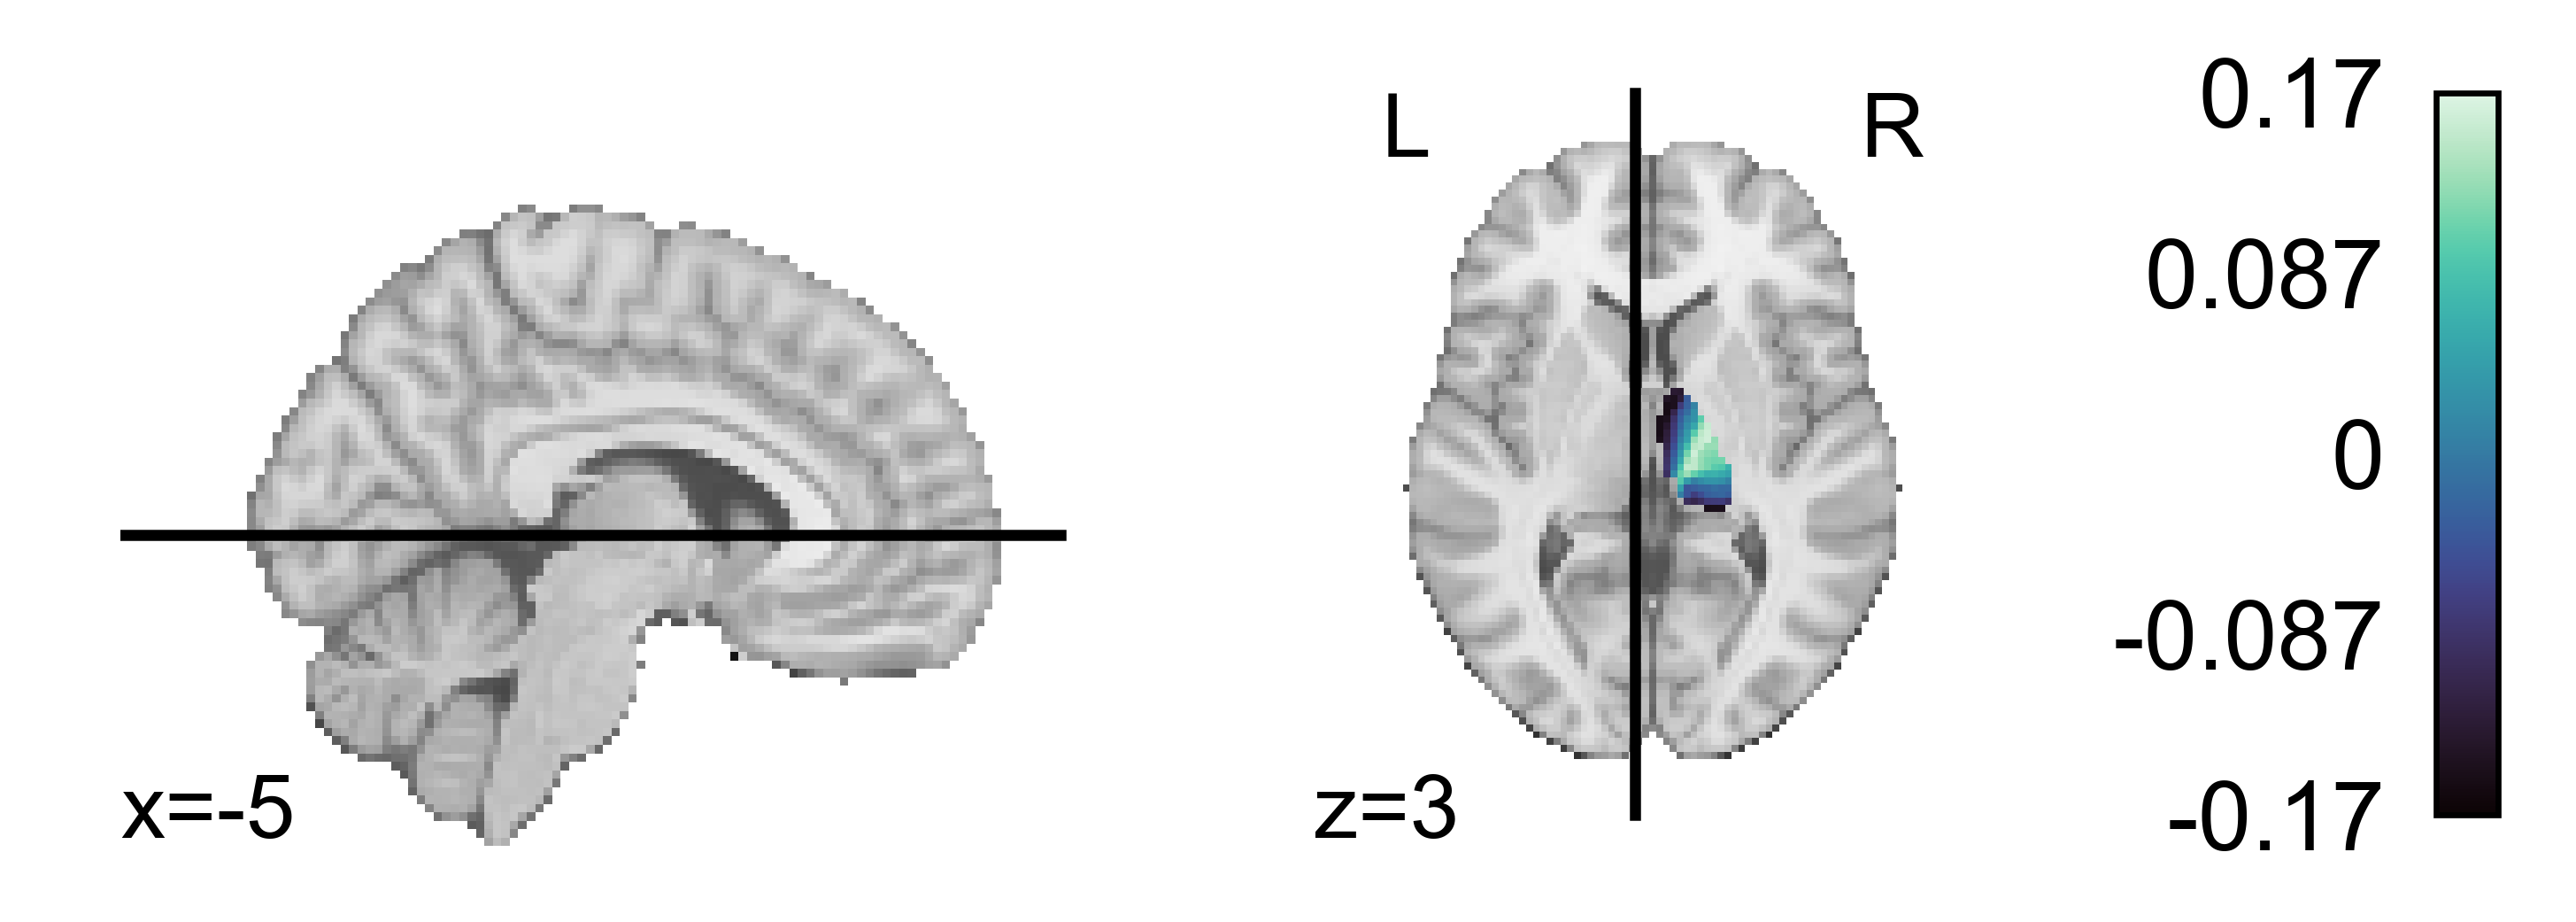

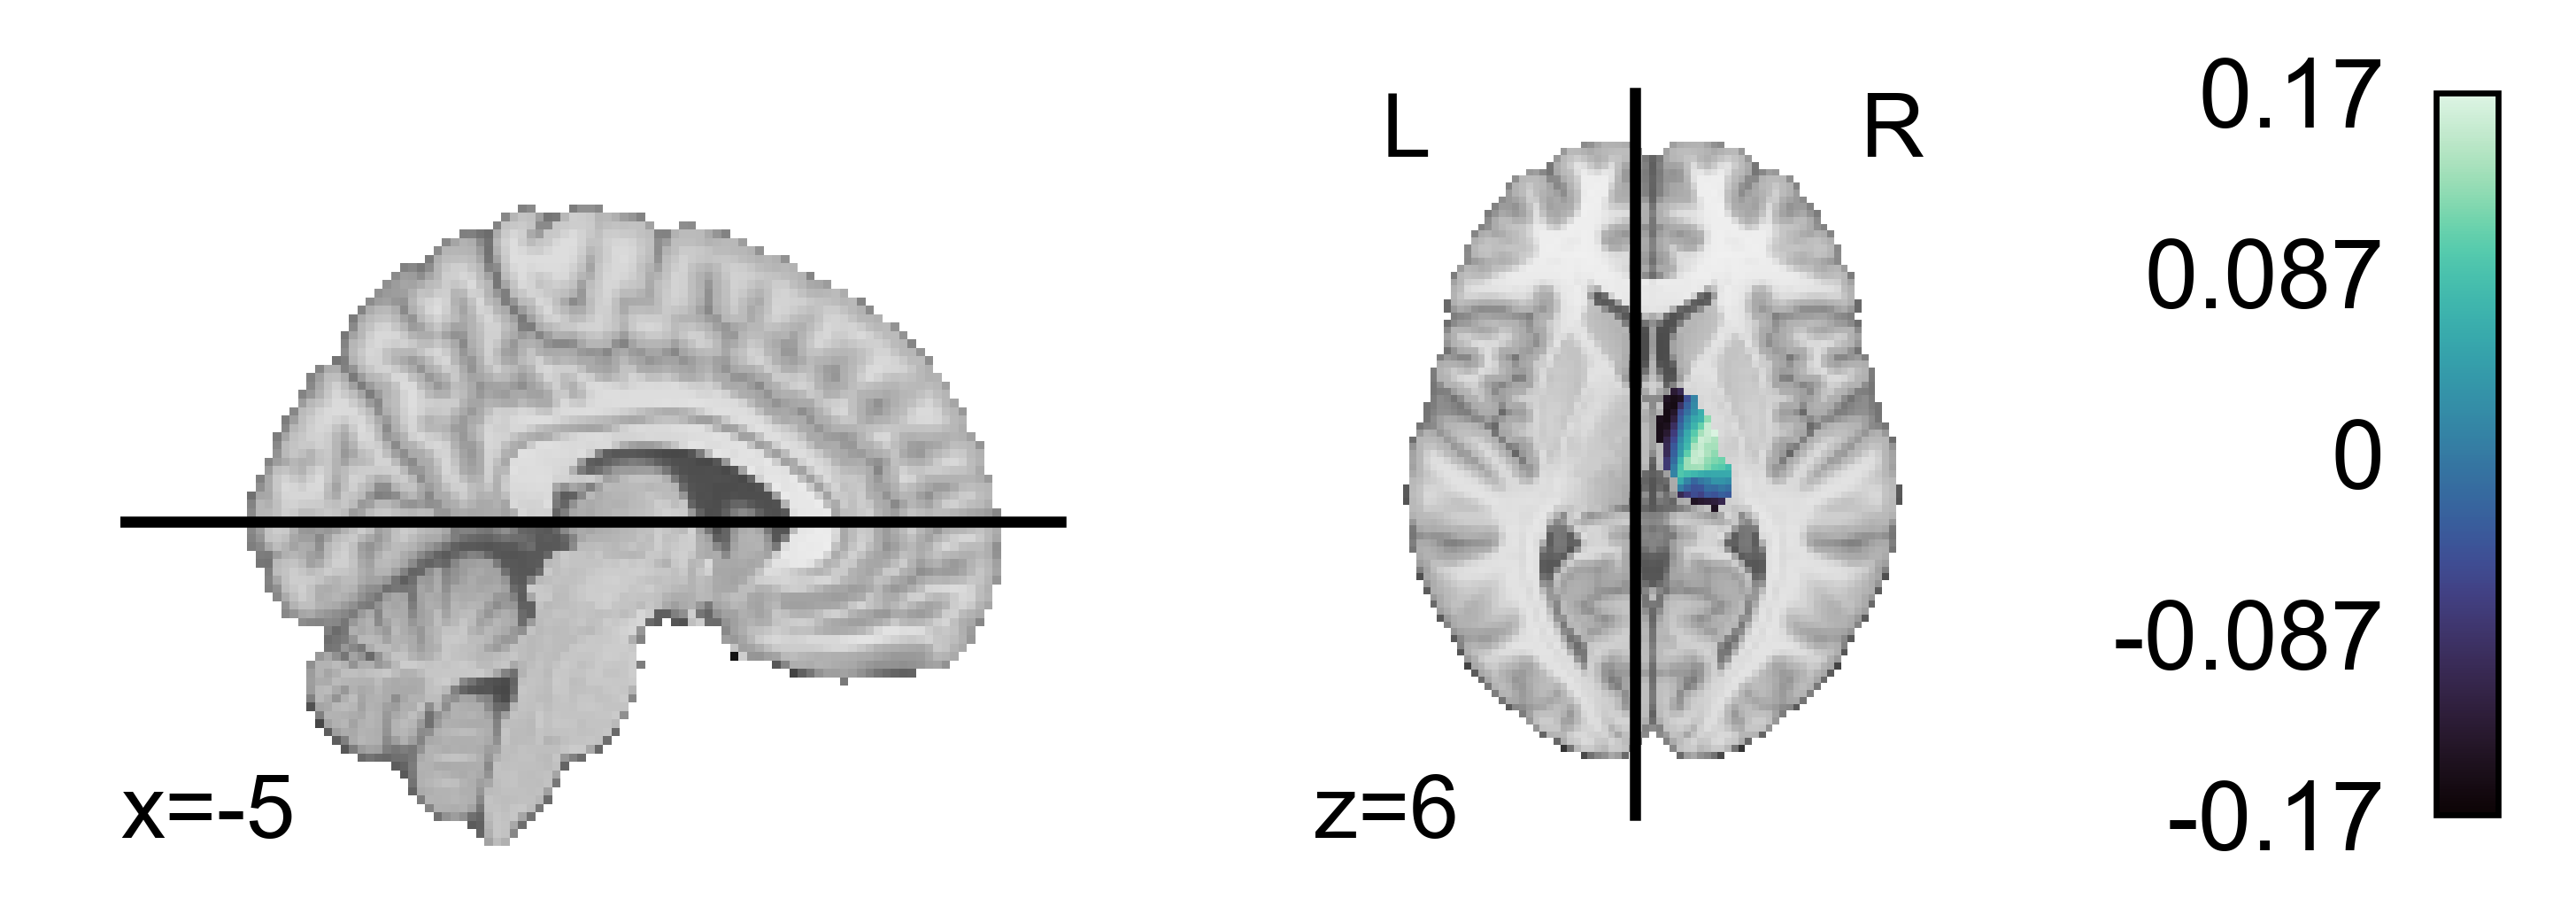

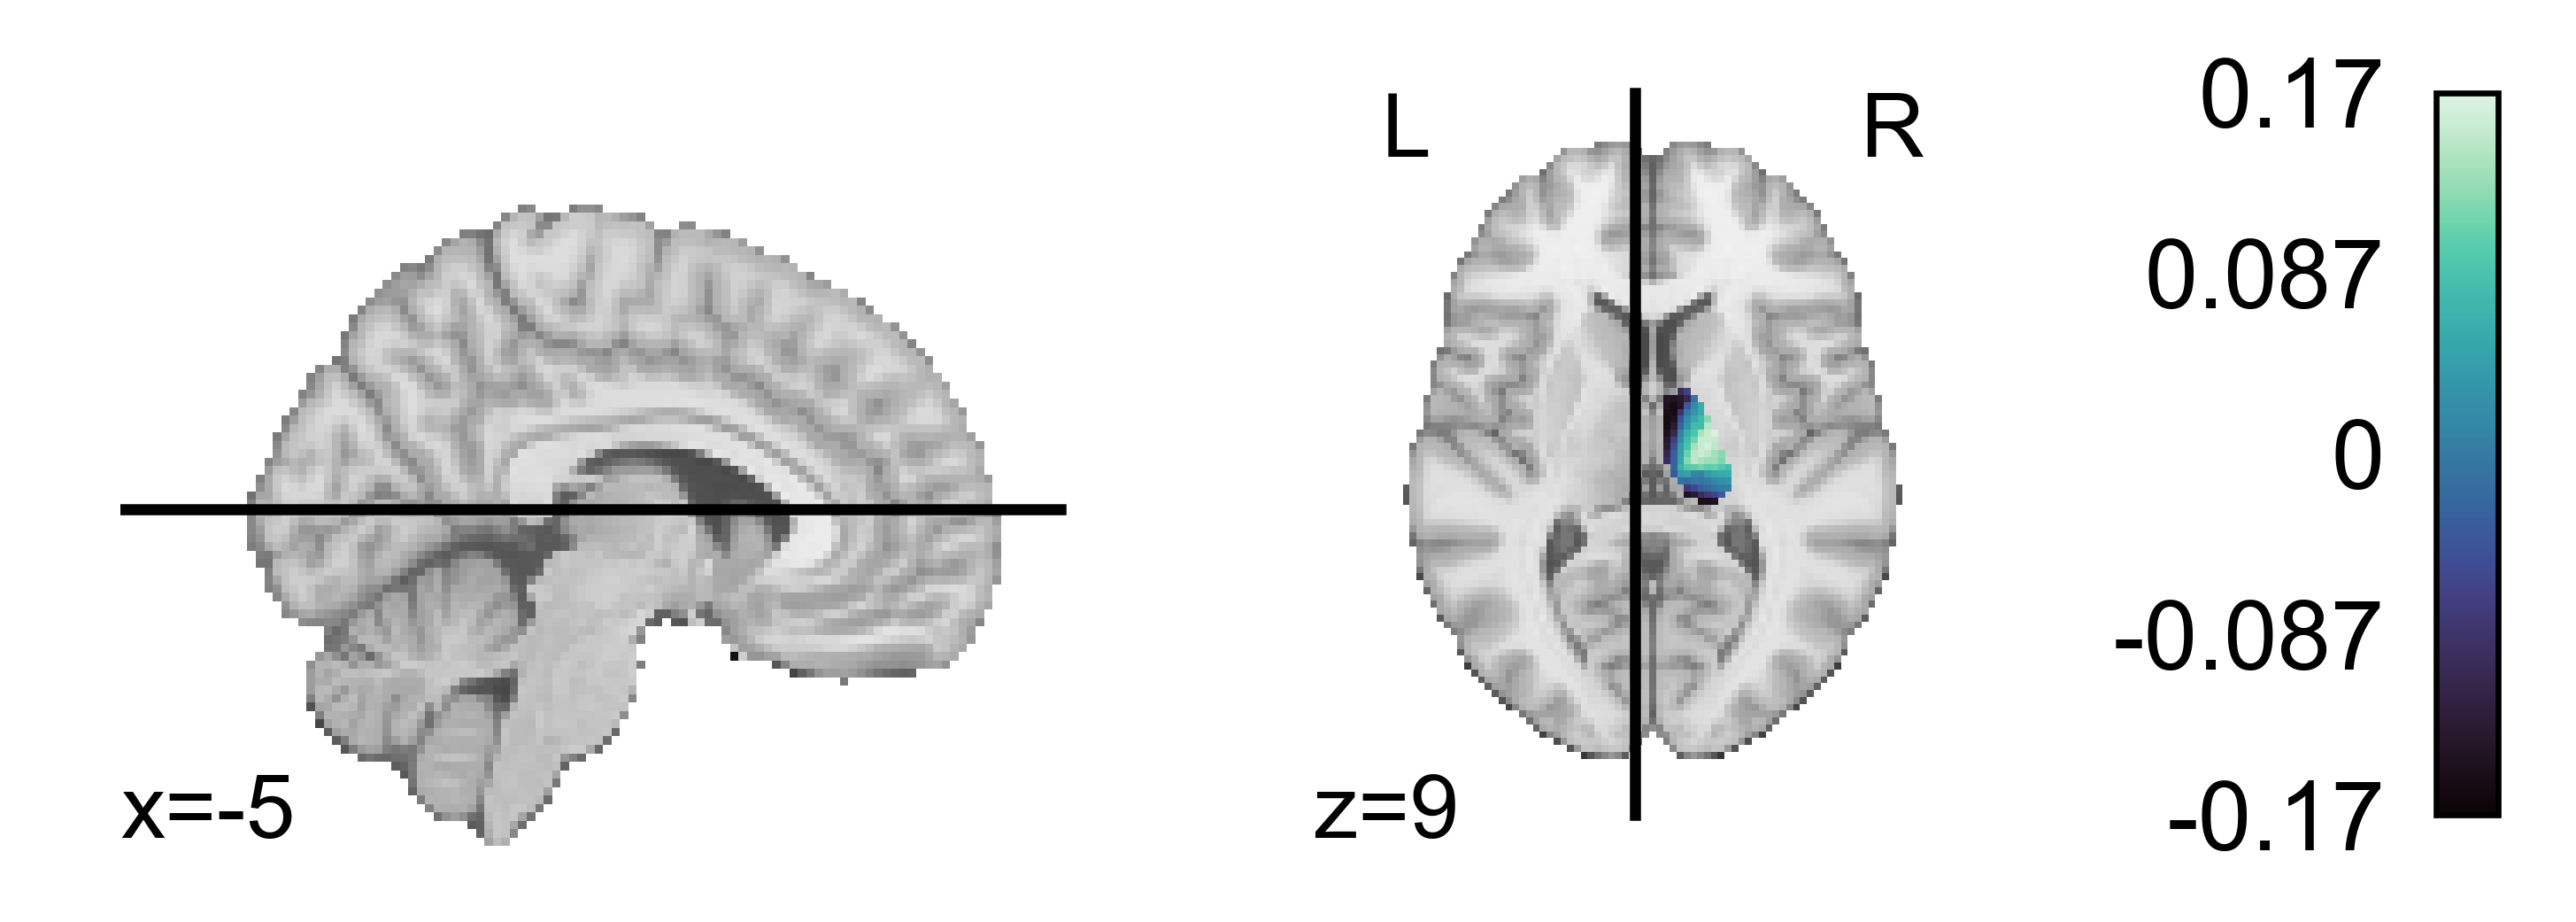

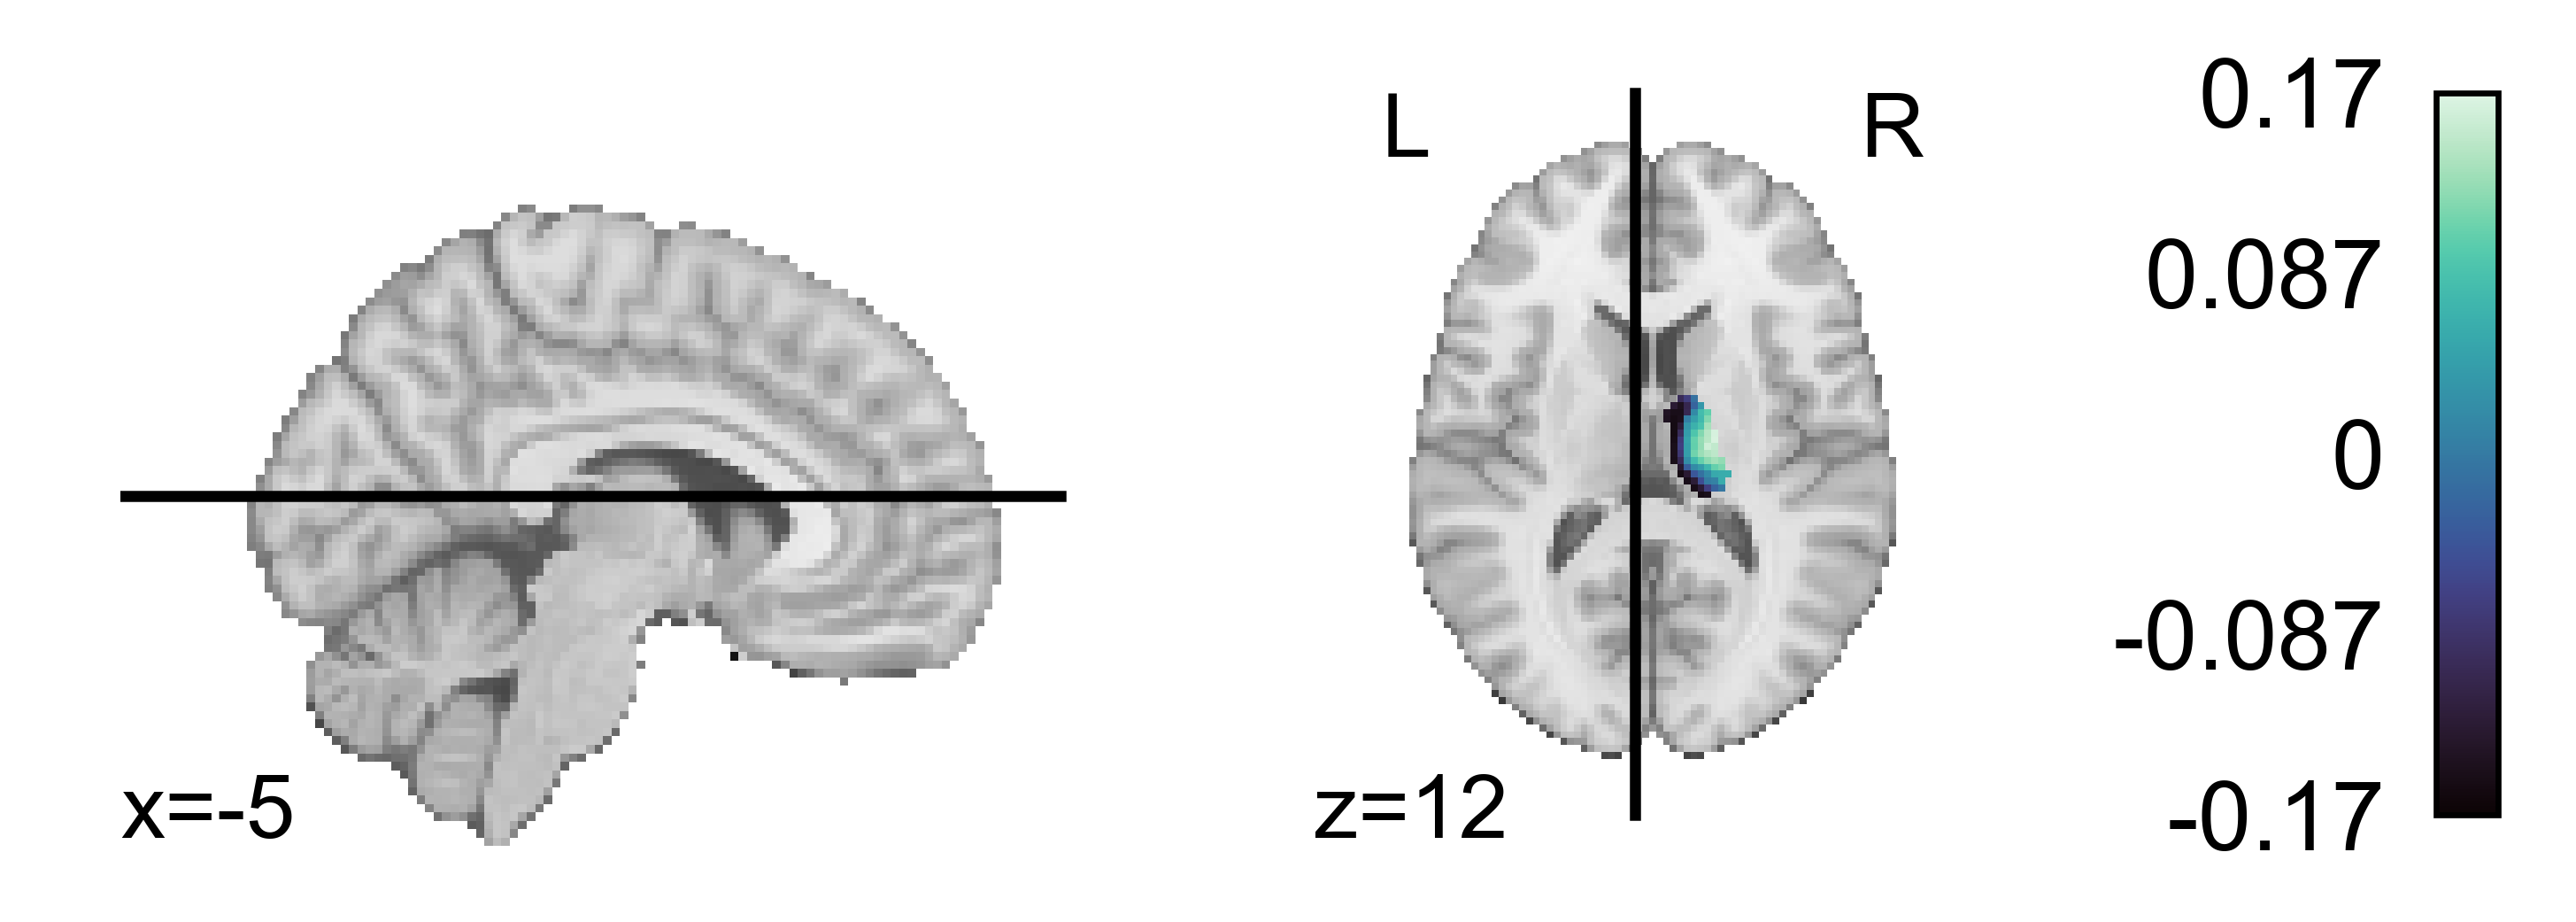

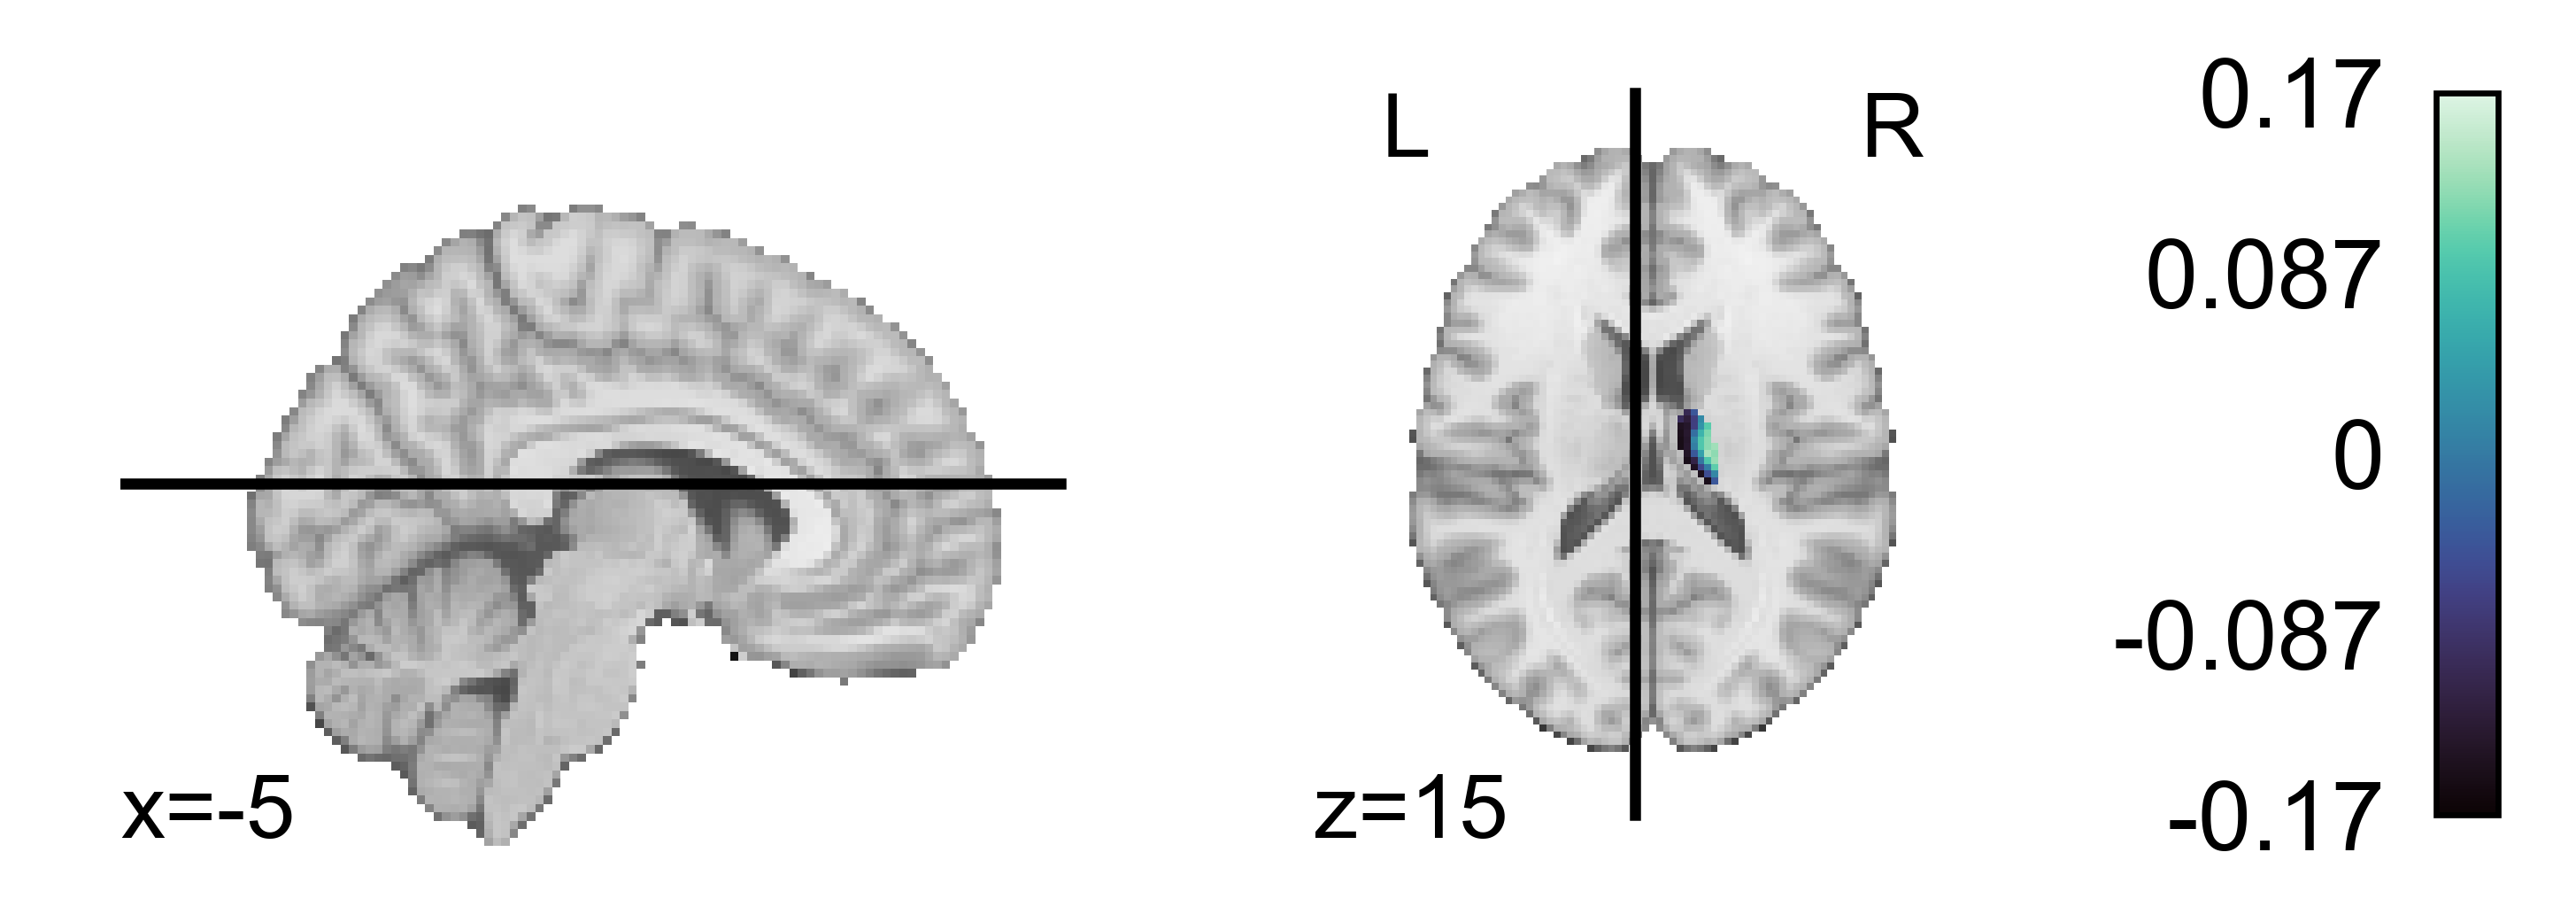

In [5]:
grad_tha_1="/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradient1_right_tha.nii.gz"

slice_z=(0,3,6,9,12,15)

for i , z in enumerate(slice_z):
    fig, ax = plt.subplots(1, figsize=(6, 2), dpi=600)
    display= plotting.plot_stat_map(grad_tha_1, display_mode="xz", 
                                cmap="mako", 
                                symmetric_cbar=True,
                                colorbar=True,
                                draw_cross=True, 
                                figure=fig, axes=ax,
                                dim=0.1,
                                cut_coords=[-5,z])   #hinterer Wert legt Schnitte in Z fest 
    display.savefig("/Project1_thalamus_gradients/plots/figure1/grad1_on_mni_z{}_rh.svg".format(z))

## Gradient 2 plotted on thalamus

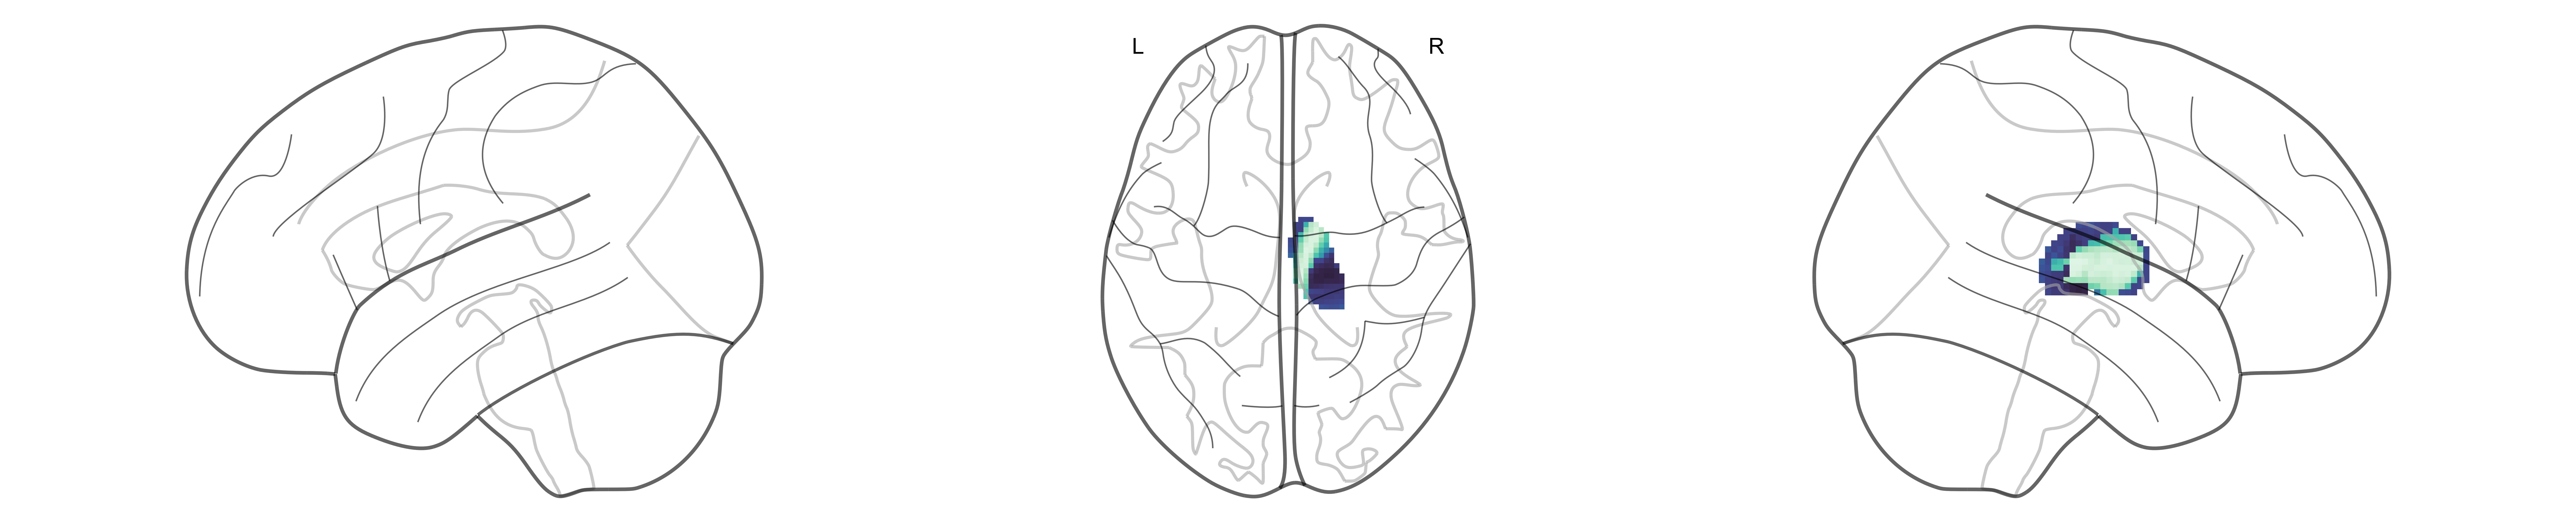

In [36]:
grad_tha_2="/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradient2_right_tha.nii.gz"

fig, ax = plt.subplots(1, figsize=(25,5), dpi=600)
display=plotting.plot_glass_brain(grad_tha_2, display_mode="lzr",
                                  figure=fig, axes=ax,
                                  colorbar=False, plot_abs=False, 
                                  symmetric_cbar=False, 
                                  cmap="mako",
                                  alpha=0.6)
display.savefig("/Project1_thalamus_gradients/plots/figure1/grad2_glassbrain_rh.svg")


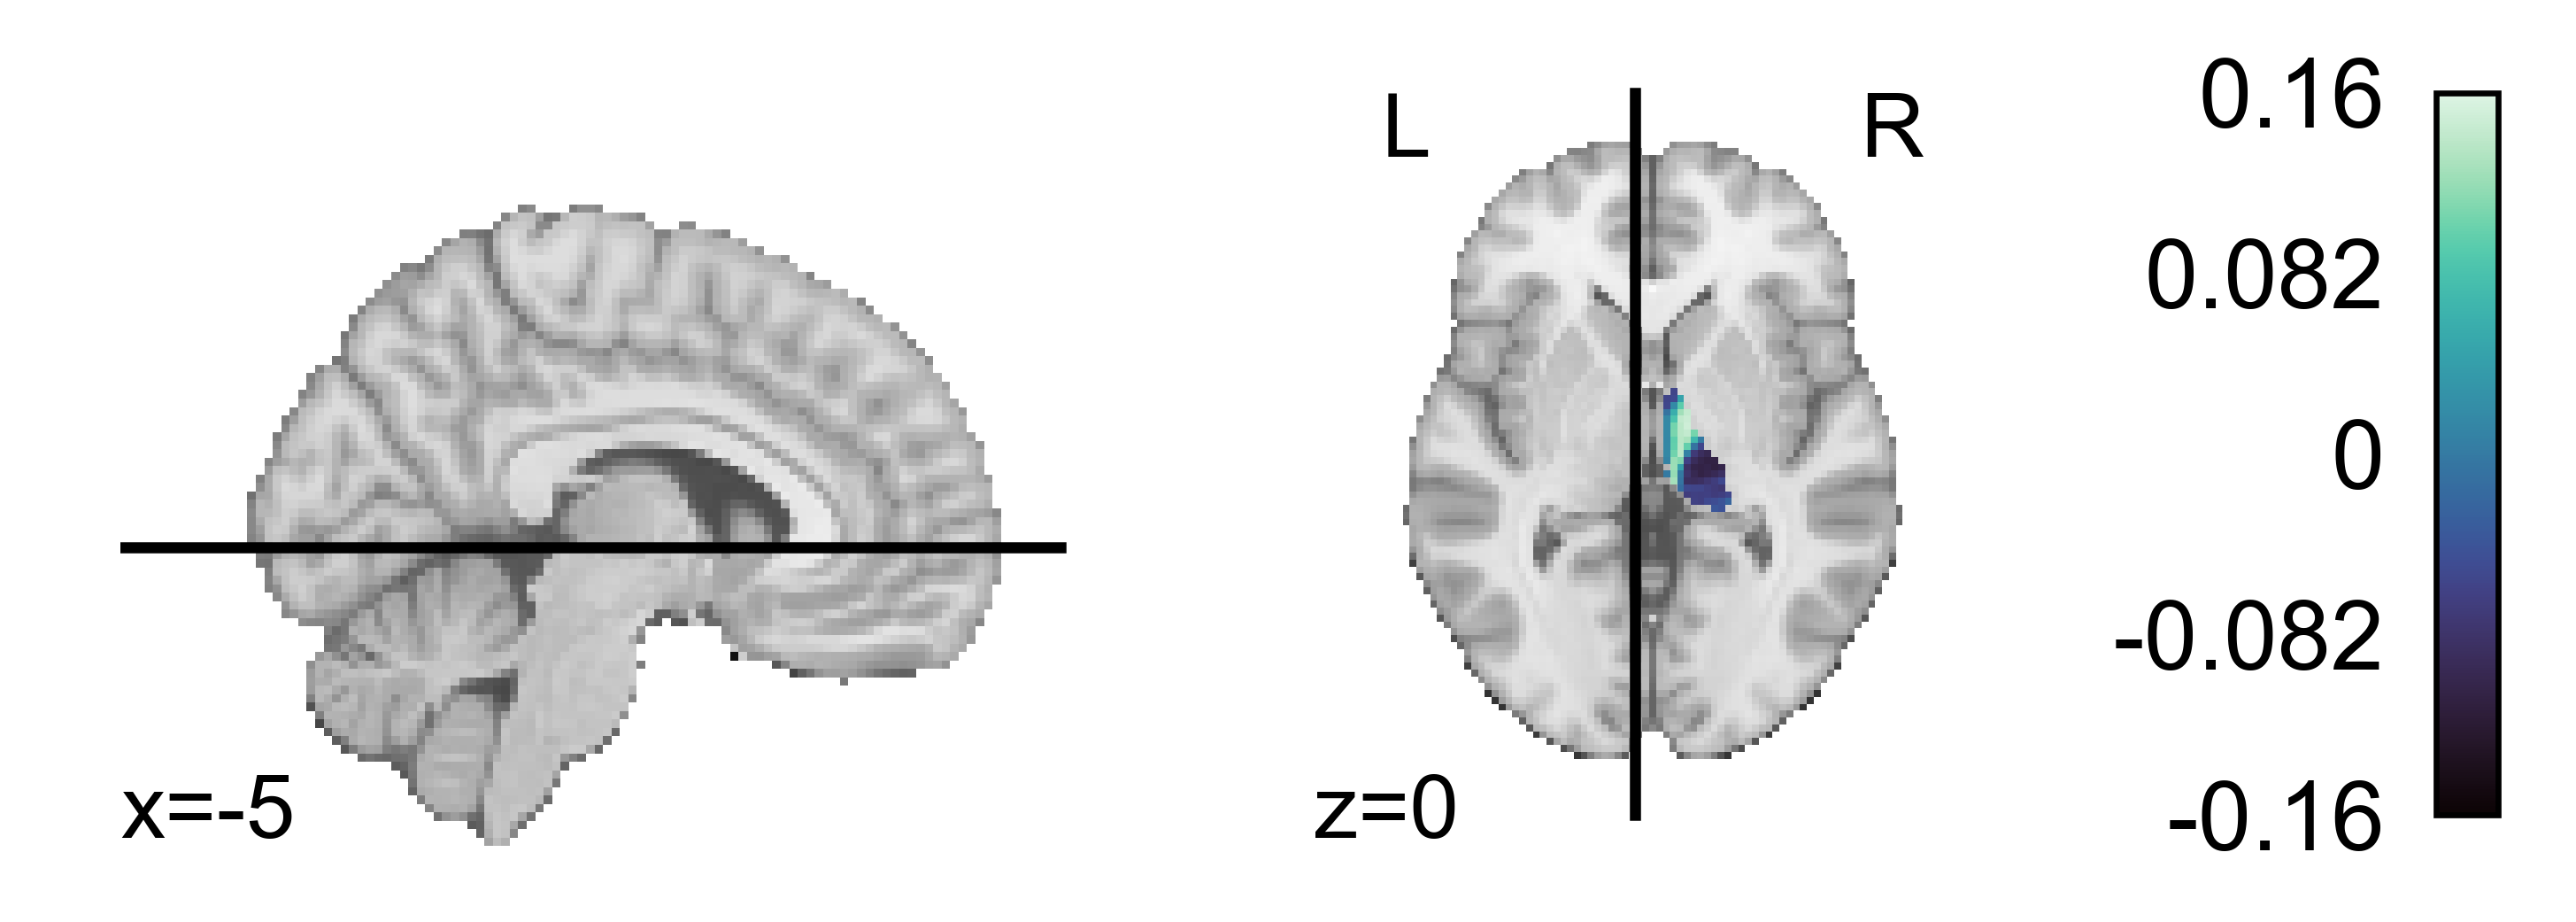

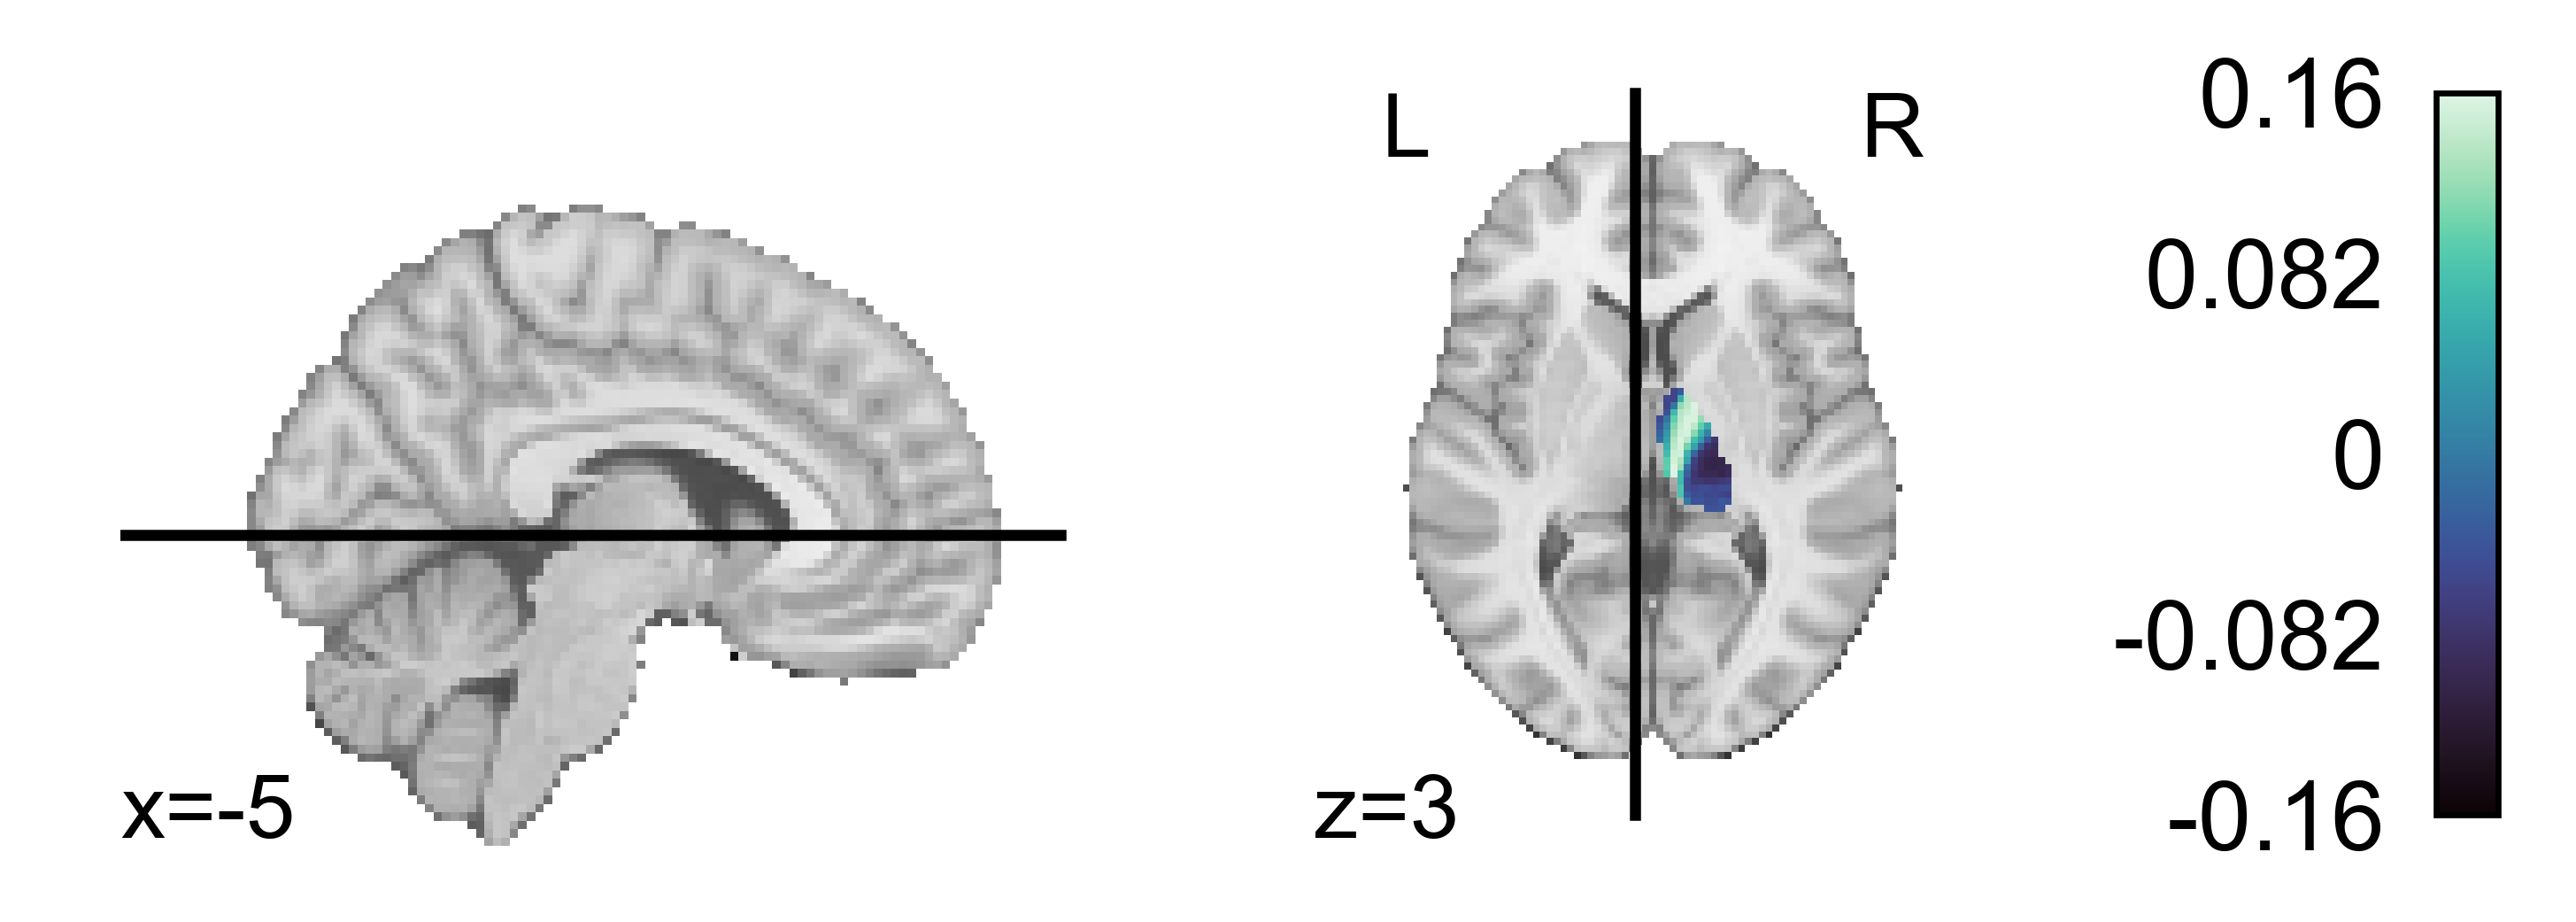

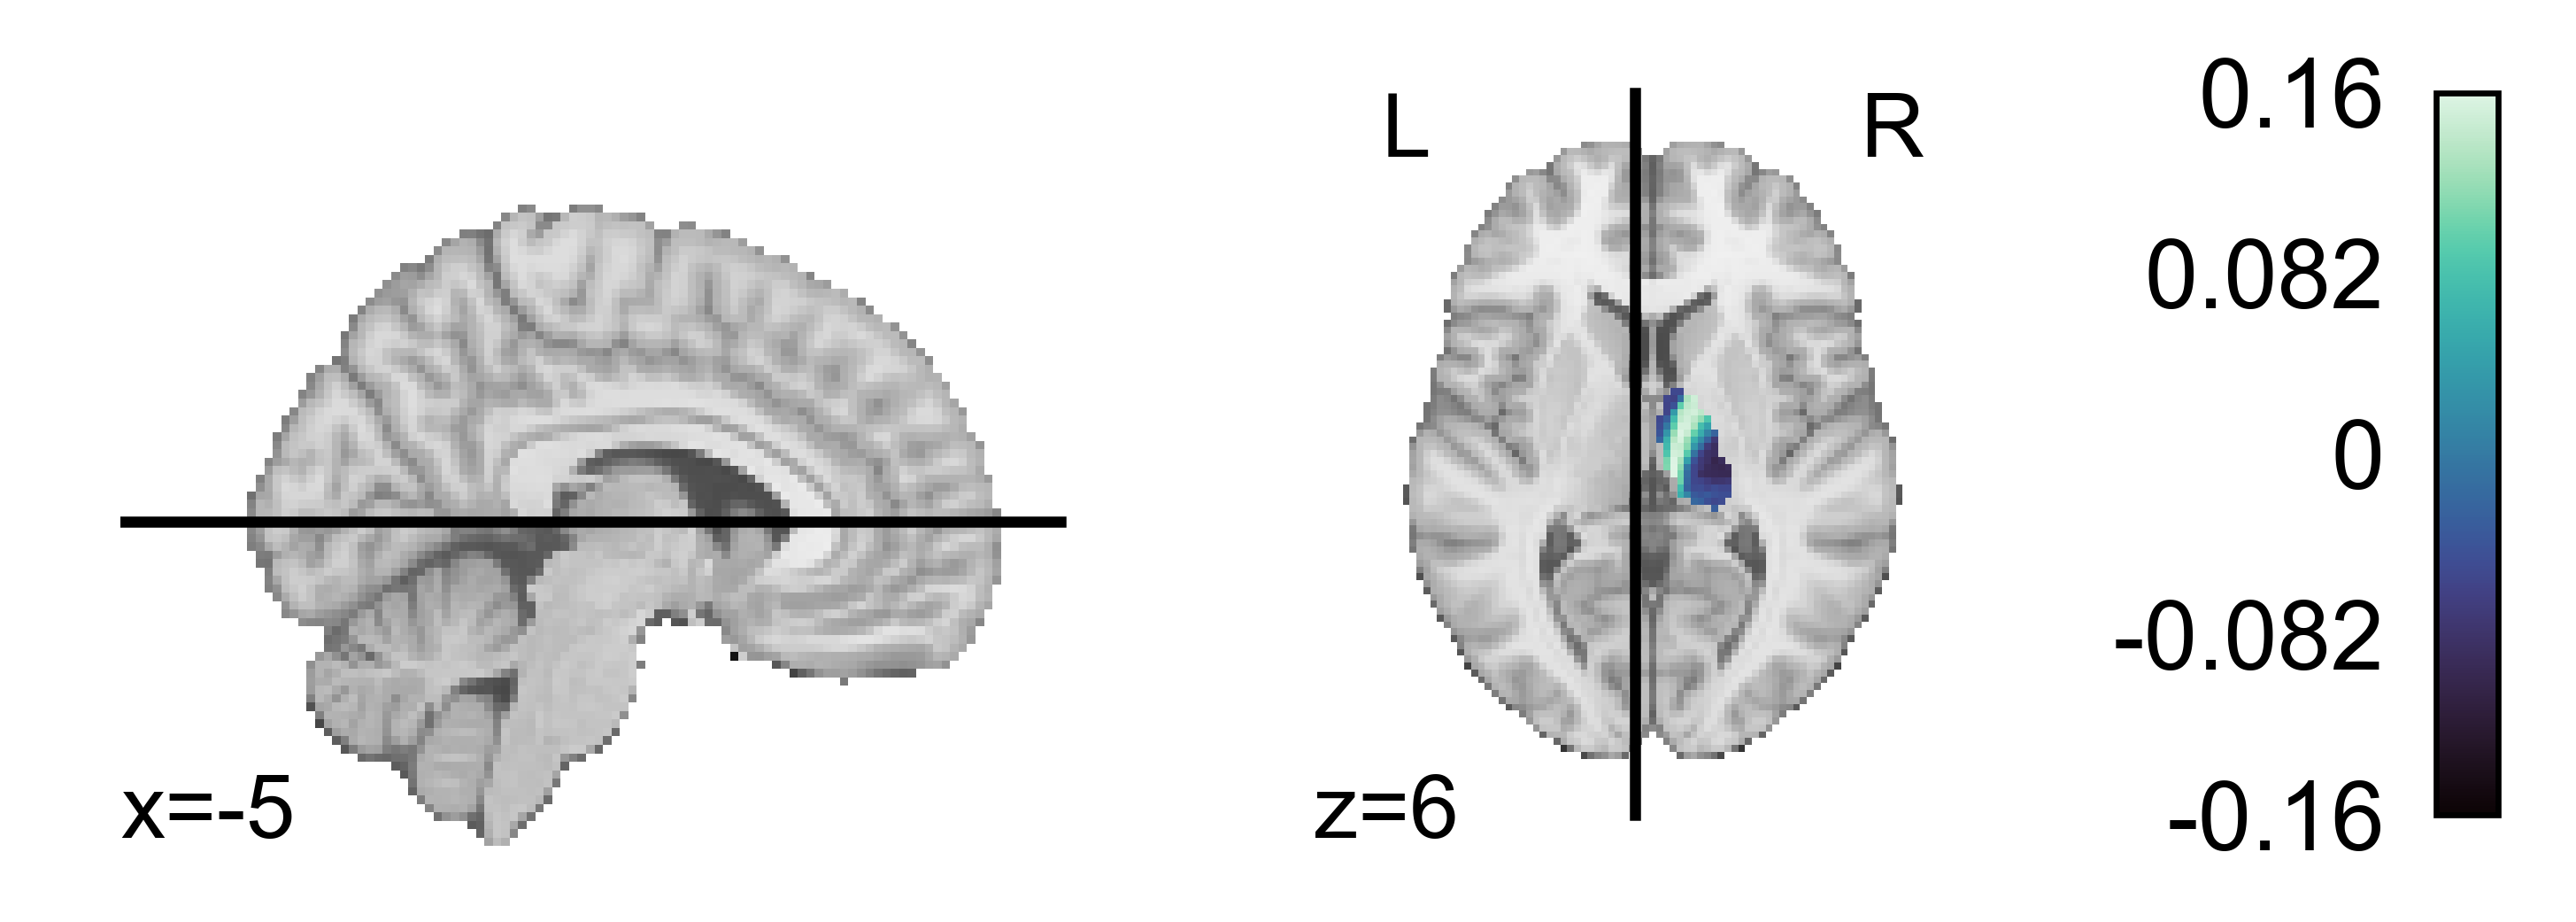

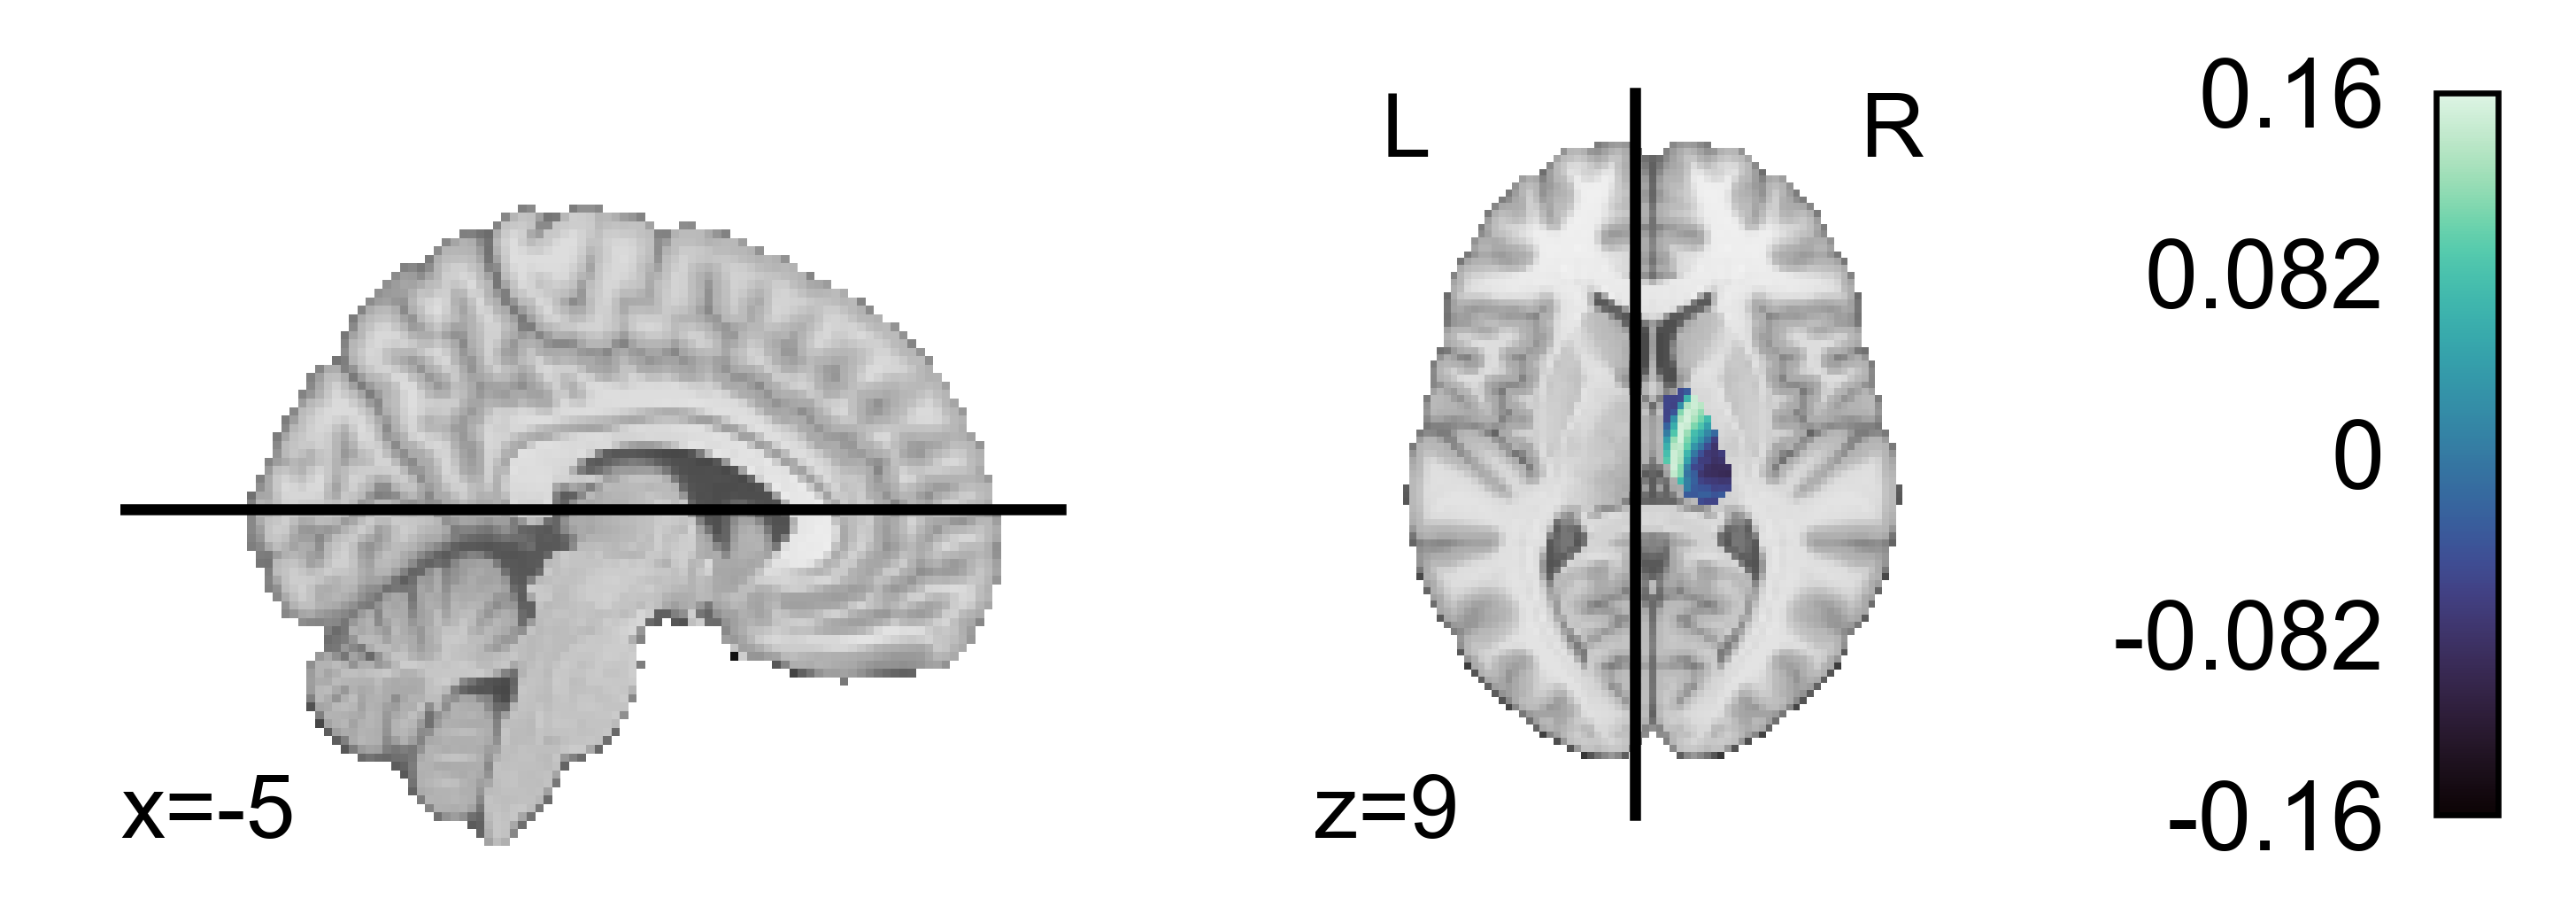

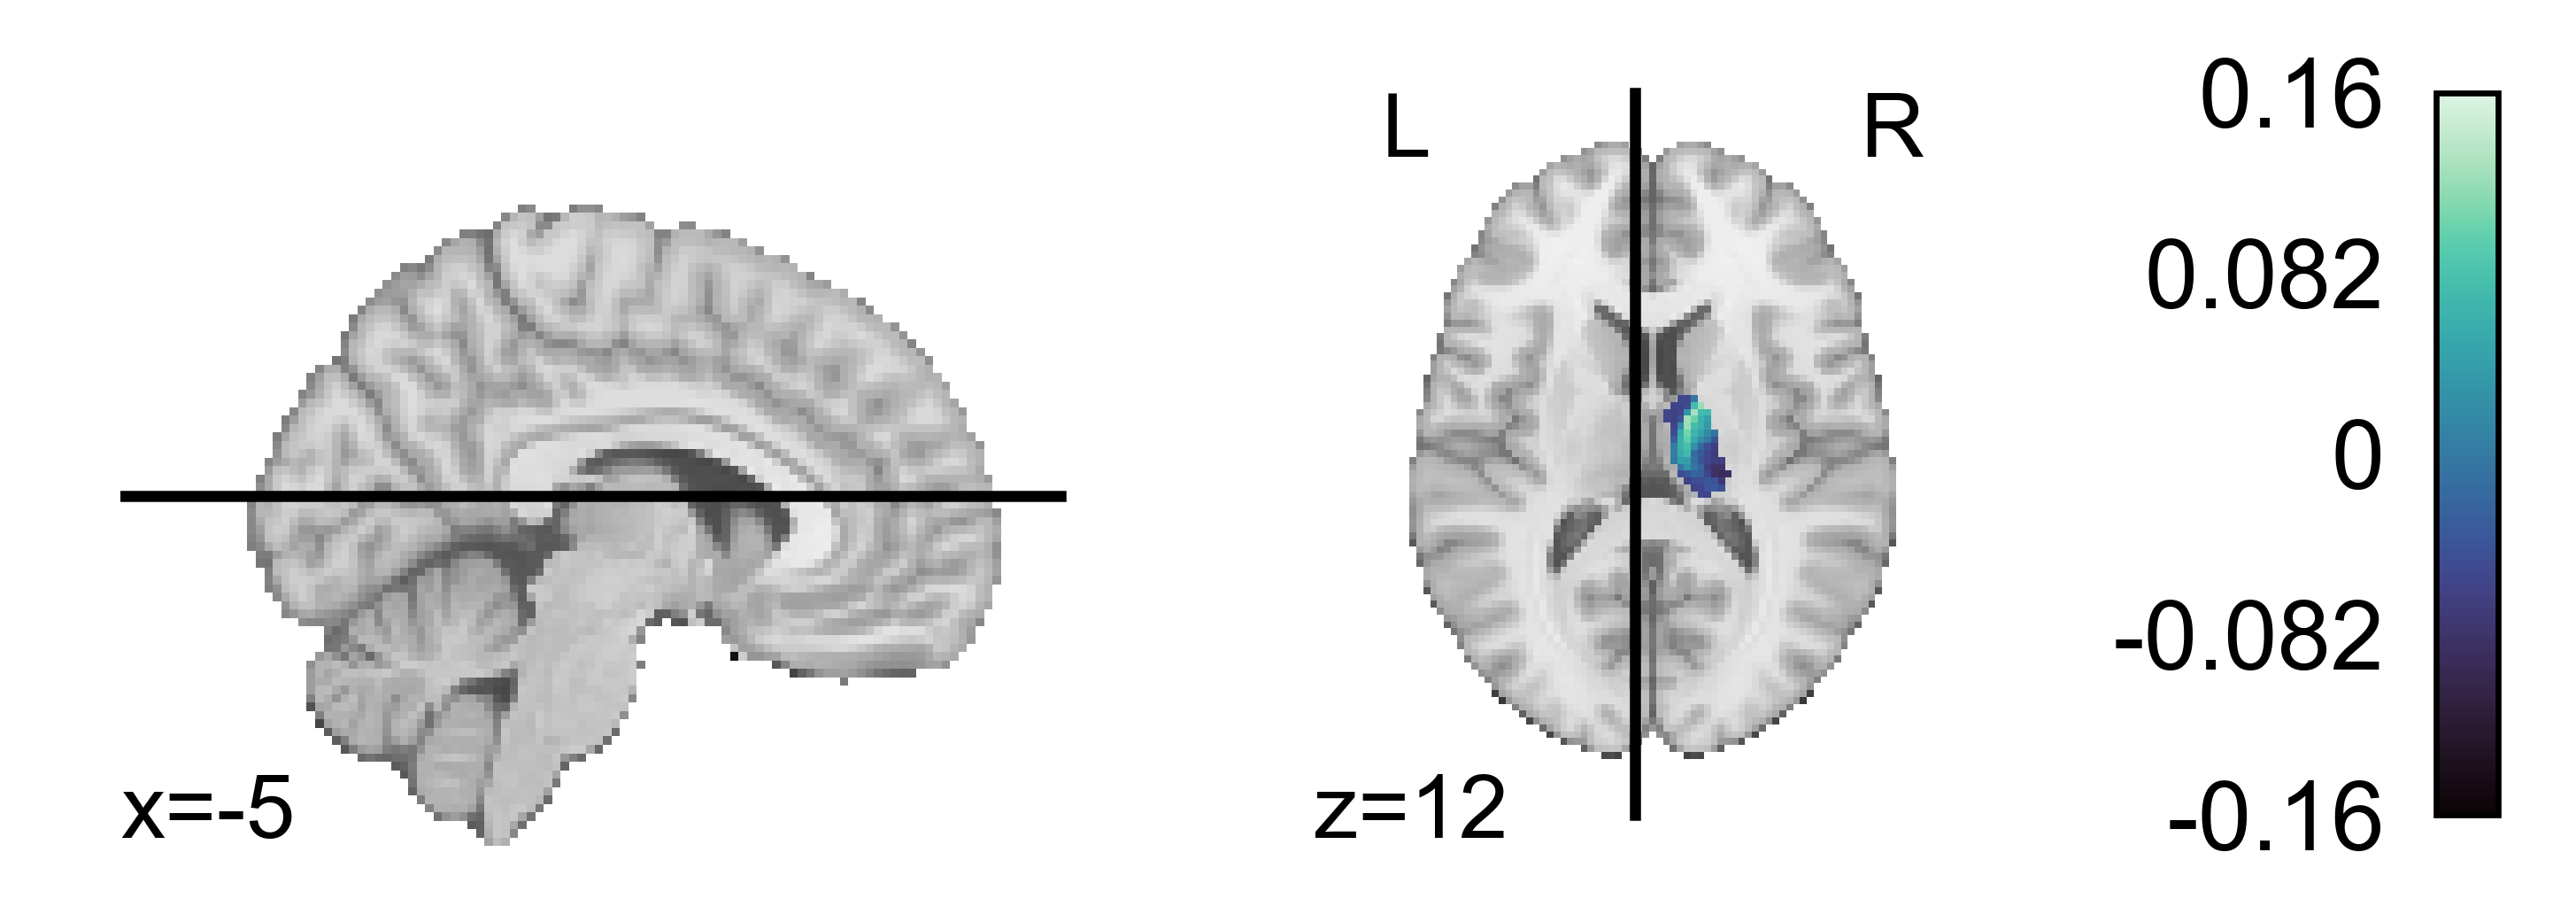

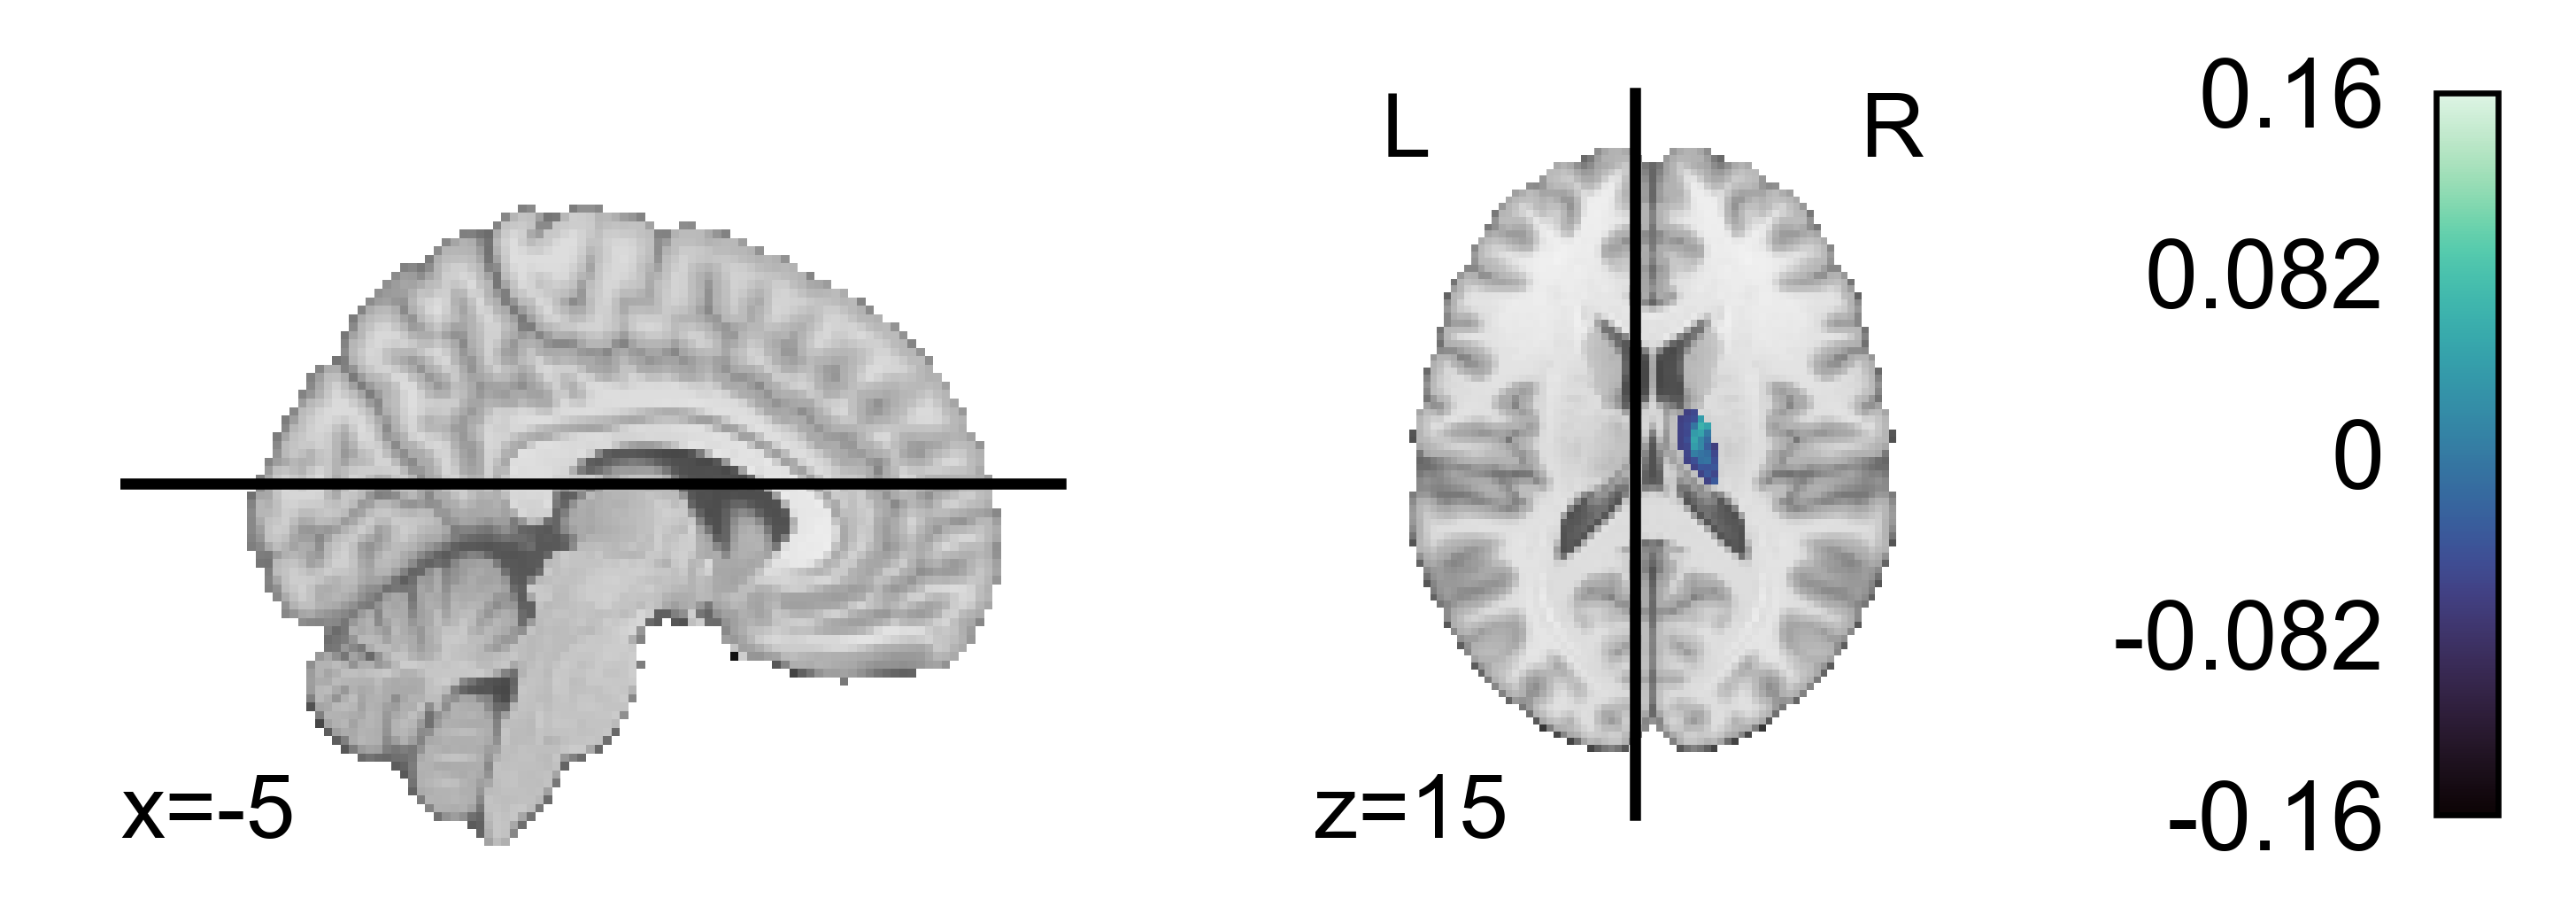

In [6]:
grad_tha_2="/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/gradient2_right_tha.nii.gz"

slice_z=(0,3,6,9,12,15)

for i , z in enumerate(slice_z):
    fig, ax = plt.subplots(1, figsize=(6, 2), dpi=600)
    display= plotting.plot_stat_map(grad_tha_2, display_mode="xz", 
                                cmap="mako", 
                                symmetric_cbar=True,
                                colorbar=True,
                                draw_cross=True, 
                                figure=fig, axes=ax,
                                dim=0.1,
                                cut_coords=[-5,z])   #hinterer Wert legt Schnitte in Z fest 
    display.savefig("/Project1_thalamus_gradients/plots/figure1/grad2_on_mni_z{}_rh.svg".format(z))